In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu
from scipy.linalg import solve
from scipy.linalg import inv
from numpy.linalg import matrix_rank
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.colors as mcolors
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats

In [2]:
A = np.mat([[1,2,1],[3,8,1],[0,4,1]])
A

matrix([[1, 2, 1],
        [3, 8, 1],
        [0, 4, 1]])

In [46]:
U = np.mat([[1,2,1],[0,2,-2],[0,0,5]])
U

matrix([[ 1,  2,  1],
        [ 0,  2, -2],
        [ 0,  0,  5]])

#### Step 1. 

$A = \begin{bmatrix} 1&2&1 \\ 3&8&1 \\ 0&4&1 \end{bmatrix}$

I would like to make this matrix into a triangular form **(AKA Row Echelon Form)**. 

$A = \begin{bmatrix} 1&2&1 \\ 3&8&1 \\ 0&4&1 \end{bmatrix} 
\begin{matrix}  && \\ R_2 - 3R_1 \\ && \end{matrix}
\begin{bmatrix} 1&2&1 \\ 0&2&-2 \\ 0&4&1 \end{bmatrix} 
\begin{matrix}  && \\ && \\ R_3-2R_2 \end{matrix}
\begin{bmatrix} 1&2&1 \\ 0&2&-2 \\ 0&0&5 \end{bmatrix} 
$

Now we are going to call it U 

$U = \begin{bmatrix} 1&2&1 \\ 0&2&-2 \\ 0&0&5 \end{bmatrix}$

##### Side Note

I can define A as this. 

$A = \begin{array}{ccc|c}  1 & 2 & 1 & 2 \\ 3 & 8 & 1 & 12 \\ 0 & 4 & 1 & 2 \end{array}$

This is **Augmented Matrix**. This means that 

$\begin{cases} X + 2Y + Z = 2 \\ \\ 3X + 8Y + Z = 12 \\ \\ 4Y + Z = 2  \end{cases}$

One way of solving for X, Y, and Z is to solve for X and plug it into other two equations. 
However, there is another way. Another way is to compute it like the following. For $R_2$

$\begin{array}
\ \ \ \ 3X + 8Y + 1Z = 12 \\ 
- 3(1X + 2Y + 1Z) = 3(2) \\
\hline \ \ \ \ 2y - 2z = 6
\end{array}$

Subtract these two equations. Then we can get rid of X. And if we continue this process, we eventually get this result. 

$\begin{cases} X + 2Y + Z = 2 \\ \\ 2Y - 2Z = 6 \\ \\  5Z = -10  \end{cases}$

So from here, we can do the **Back Substitution** to the X, Y and Z.  


#### Step 2. 

$E \cdot A = U$ 

E stands for **Elimination Matrix**. Or you could also call it **Elementary Matrix**.

$E \cdot \begin{bmatrix} 1&2&1 \\ 3&8&1 \\ 0&4&1 \end{bmatrix} = \begin{bmatrix} 1&2&1 \\ 0&2&-2 \\ 0&0&5 \end{bmatrix}$

And this is same thing as 

($E_{32} \cdot E_{21})\cdot A = U$

And I can definitely move the parentesis: 

$E_{32} \cdot (E_{21} \cdot A) = U$

Let's say we are interested in finding $E_{21}$.

$E_{21} \cdot A = \begin{bmatrix} 1&2&1 \\ 0&2&-2 \\ 0&4&1 \end{bmatrix}$

This matrix on the right hand side is the matrix where we did $R_3 - 2R_2$ computation.

$E_{21} \cdot \begin{bmatrix} 1 & 2 & 1 \\ 3 & 8 & 1 \\ 0 & 4 & 1 \end{bmatrix} = \begin{bmatrix} 1&2&1 \\ 0&2&-2 \\ 0&4&1 \end{bmatrix}$

When you try to find the left matrix, you have to do row vector combination. 

$\begin{bmatrix} a & b & c \\ \hline d & e & f \\ \hline g & h & i \end{bmatrix} \cdot \begin{bmatrix} 1 & 2 & 1 \\ \hline 3 & 8 & 1 \\ \hline 0 & 4 & 1 \end{bmatrix} = \begin{bmatrix} 1&2&1 \\ \hline 0&2&-2 \\ \hline 0&4&1 \end{bmatrix}$

$ \ $

$\begin{matrix}
a \cdot \begin{bmatrix} 1 & 2 & 1 \end{bmatrix}\\ 
+ \\ 
b \cdot \begin{bmatrix} 3 & 8 & 1 \end{bmatrix}\\
+ \\ 
c \cdot \begin{bmatrix} 0 & 4 & 1 \end{bmatrix}
\end{matrix}
\ \ \ =  \ \ \ \begin{bmatrix} 1 & 2 & 1 \end{bmatrix}$

And it turns out that a, b, and c are 1, 0, and 0 respectively. And I have to find the rest of it just like above. 

In [96]:
# Let's try the examples above with codes. 

result = np.mat([[1,2,1], [0,2,-2], [0,4,1]])
E_21 = solve(A.T,result.T).T
print(E_21)

[[ 1. -0. -0.]
 [-3.  1. -0.]
 [ 0. -0.  1.]]


In [107]:
# What does that mean? If I do the dot product of E_21 and A, I would get the result matrix. 

print(np.dot(E_21, A))
print(result)

[[ 1.  2.  1.]
 [ 0.  2. -2.]
 [ 0.  4.  1.]]
[[ 1  2  1]
 [ 0  2 -2]
 [ 0  4  1]]


**Side Note :** When I try to find a matrix that is placed on the right side of the left hand side of the equaiton, I have to do column vector combination. 

$
\left\{ 
\begin{array}{l|l}
1 & \; 0 & 0 \\ 
0 & \; 1 & 0 \\ 
0 & -2 & 1 \\
\end{array}
\right\}
\cdot
\left\{ 
\begin{array}{l|l}
a & b & c \\ 
d & e & f \\ 
g & h & i \\
\end{array}
\right\}
= 
\left\{ 
\begin{array}{l|l}
1 & 2 & \; 1 \\ 
0 & 2 & -2 \\ 
0 & 0 & \; 5 \\
\end{array}
\right\}
$


$\begin{array}\\
    a \cdot \begin{bmatrix}1 \\ 0 \\ 0 \end{bmatrix}
    +
    d \cdot \begin{bmatrix}0 \\ 1 \\ -2 \end{bmatrix}
    +
    g \cdot \begin{bmatrix}0 \\ 0 \\ 1 \end{bmatrix}
    =  
    \begin{bmatrix}1 \\ 0 \\ 0\end{bmatrix}
    \\
    b \cdot \begin{bmatrix}1 \\ 0 \\ 0\end{bmatrix}
    +
    e \cdot \begin{bmatrix}0 \\ 1 \\ -2\end{bmatrix}
    +
    h \cdot \begin{bmatrix}0 \\ 0 \\ 1\end{bmatrix}
    =  
    \begin{bmatrix}1 \\ 0 \\ 0\end{bmatrix}
\end{array}$


##### Side Note 

To go from $\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$ to $\begin{bmatrix} 2 & 1 \\ 4 & 3 \end{bmatrix}$

$\begin{bmatrix} 0 & 1 \\ \hline 1 & 0 \end{bmatrix} \cdot \begin{bmatrix} 1 & 2 \\ \hline 3 & 4 \end{bmatrix} = \begin{bmatrix} 3 & 4 \\ \hline 1 & 2 \end{bmatrix}$

I would like to do the dot product with the same matrix $\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$, but on the other side. 

$\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \cdot \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = \begin{bmatrix} 2 & 1 \\ 4 & 3 \end{bmatrix}$

**Look how they yield different results when I do the dot product of a same matrix, but from different sides.** 

But aside from where I multiply this matrix, what it does is switching the rows or columns depending on its multiplication sides. Since it's changing the arrangement, we call it **permutation matrix**. 

### Inverse Matrix 

Say $A = \begin{bmatrix} 1 & 2 & 1 \\ 3 & 8 & 1 \\ 0 & 4 & 1 \end{bmatrix} \;$ and $\; U = \begin{bmatrix} 1 & 2 & 1 \\ 0 & 2 & -2 \\ 0 & 4 & 1 \end{bmatrix}$ 

$E_{21} \cdot A = U$

And $E_{21} = \begin{bmatrix} 1 & 0 & 0 \\ -3 & 1 & 0 \\ 0 & 0 & 1\end{bmatrix}$

Why? because we did $R_2 - 3R_1$ for the second row and nothing else. 

In [123]:
# Let's check 

U = np.dot(E_21, A)
U

matrix([[ 1.,  2.,  1.],
        [ 0.,  2., -2.],
        [ 0.,  4.,  1.]])

#### Then what is the inverse of $E_{21}$?

For the second row of U, we subtracted $3R_1$ from $R_2$. So for the inverse, we have to add back in $3R_1$.

So $E_{21}^{-1} = \begin{bmatrix} 1 & 0 & 0 \\ 3 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$

This means as the following: 

$E_{21}^{-1} \cdot U = A$

##### But this looks like I always need U to compute the inverse. 

No that was just an example of making use of inverse. 

So, how do we find an inverse of $E_{21}$ when $U$ is not given? 

$E_{21} \cdot E_{21}^{-1} = I$

This property has to be satisfied. So we can solve for $E_{21}^{-1}$

##### Example 

$\begin{array}\\
E_{21} \cdot A = U \\
(E_{21}^{-1}) \cdot E_{21} \cdot A = (E_{21}^{-1}) \cdot U \\
I \cdot A = (E_{21}^{-1}) \cdot U \\
A = E_{21}^{-1} \cdot U
\end{array}$

##### Side Note 

$
\begin{bmatrix} -2 & 1 \\ 0.5 & 1 \end{bmatrix}
\cdot
\begin{bmatrix} x \\ y \end{bmatrix}
=
\begin{bmatrix} 1 \\ 3 \end{bmatrix}
$

From here, we got two column vectors, $\vec{V_1} = \begin{bmatrix} -2 \\ 0.5 \end{bmatrix}$ and $\vec{V_2} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$ and we have to scale each vector by some values and do the linear combination to get the target vector, $\begin{bmatrix} 1 \\ 3\end{bmatrix}$

$
X \cdot \begin{bmatrix} -2 \\ 0.5 \end{bmatrix}
+
Y \cdot \begin{bmatrix} 1 \\ 1 \end{bmatrix}
=
\begin{bmatrix} 1 \\ 3\end{bmatrix}
$

But this one is pretty hard to get the answer by eyeballing. So we have to solve them by the system of equations. 

$\begin{cases} 
-2X + Y = 1 \\
0.5X + Y = 3
\end{cases}$

#### Or I can even make triangular matrix.  

$\left[ 
\begin{array}{cc|c}
-2 & 1 & 1 \\ 
0.5 & 1 & 3 \\ 
\end{array}
\right]
\begin{array}
\\
\\
4R_2+R_1
\end{array}
\Rightarrow
\left[ 
\begin{array}{cc|c}
-2 & 1 & 1 \\ 
0 & 5 & 13 \\ 
\end{array}
\right]
$

Then we can express the equations as below: 

$\begin{cases} 
-2X + y =1 \\
5y = 13
\end{cases}$

##### Side Note 

$E \cdot A = U$

Say I want to switch the order of E and A. Then I have to do the following. 

$A^T \cdot E^T = U^T$

### Central Point of Matrix 

We have seen these two equations: 

$1) \ \ A \cdot x = b$

$2) \ \ A \cdot E = U$

1) Let's say A is $(3x3)$ matrix. And surely x will be $(3x1)$ vector. The matrix A is consisted of 3 column vectors. And x is our scalar. And b is our target vector. Our goal is to get the target vector by using 3 different column vectors. And we combine these column vectors to acheive the target vector. This combining process is called linear combination. However, sometimes we won't be able to acheive the target vector simply by linear combination. So we need to scale each vector and then compute the linear combination. 

2) For the second equation, there could be two different ways to understand it. First of all, E is $(3x3)$ matrix and so is U. So one way to understand is to think of U as 3 column target vectors. For example, the first column vector in U could be the target vector number. We get that target vector using the three column vectors in A with scalars in the first colunn of E. 

2-1) Another way to understand the second equation is to think of it as transforming A into U. So I am transforming the first column vector in A into the first column vector in U, using other two column vecotrs in A with some scalars. The corresponding scalars are inputted in the first column of E. 

### Row Picture vs. Column Picture

Okay, so let's talk about row picture and column picture. 

Here, I have a $(2x2)$ matrix and, with this matrix, I would like to get a target value. 

$
\begin{bmatrix} -2 & 1 \\ 0.5 & 1 \end{bmatrix}
\cdot 
\begin{bmatrix} x \\ y \end{bmatrix}
=
\begin{bmatrix} 1 \\ 3 \end{bmatrix}
$


###### Row Picture

$
\begin{cases}
-2x + y = 1 \\
0.5x + y =3
\end{cases}
$

###### Column Picture

$
X \cdot
\begin{bmatrix}
-2 \\ 0.5
\end{bmatrix}
+
Y \cdot 
\begin{bmatrix}
1 \\ 1
\end{bmatrix}
= 
\begin{bmatrix}
1 \\ 3
\end{bmatrix}
$

In [113]:
start = np.mat([[1,0,0], [3,1,0], [0,0,1]])
end = np.mat([[1,2,1], [0,2,-2], [0,4,1]])

In [114]:
np.dot(start,end)

matrix([[1, 2, 1],
        [3, 8, 1],
        [0, 4, 1]])

In [116]:
E_21

array([[ 1., -0., -0.],
       [-3.,  1., -0.],
       [ 0., -0.,  1.]])

In [117]:
inv(E_21)

array([[ 1.,  0., -0.],
       [ 3.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [118]:
np.dot(E_21, inv(E_21))

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [119]:
np.dot(inv(E_21), E_21)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [1]:
############################################################################3

In [108]:
start = np.mat([[1,2],[3,4]])
end = np.mat([[1,3],[2,4]])

In [109]:
solve(start, end)

array([[ 0. , -2. ],
       [ 0.5,  2.5]])

In [3]:
prac_mat = np.mat([[1,2,1], [0,2,-2], [0,0,5]])

### Lecture 3

#### Matrix Multiplication methods 

$\begin{array}{ccc}
A && B && C \\
\begin{bmatrix}
a_{1,1} & a_{1,2} & a_{1,3} & a_{1,4} \\
a_{2,1} & a_{2,2} & a_{2,3} & a_{2,4} \\
a_{3,1} & a_{3,2} & a_{3,3} & a_{3,4} \\ 
a_{4,1} & a_{4,2} & a_{4,3} & a_{4,4} \\
\end{bmatrix}
&
\cdot
&
\begin{bmatrix}
b_{1,1} & b_{1,2} & b_{1,3} & b_{1,4} \\
b_{2,1} & b_{2,2} & b_{2,3} & b_{2,4} \\
b_{3,1} & b_{3,2} & b_{3,3} & b_{3,4} \\ 
b_{4,1} & b_{4,2} & b_{4,3} & b_{4,4} \\
\end{bmatrix}
&
=
&
\begin{bmatrix}
c_{1,1} & c_{1,2} & c_{1,3} & c_{1,4} \\
c_{2,1} & c_{2,2} & c_{2,3} & c_{2,4} \\
c_{3,1} & c_{3,2} & c_{3,3} & c_{3,4} \\ 
c_{4,1} & c_{4,2} & c_{4,3} & c_{4,4} \\
\end{bmatrix}
\end{array}$

#### Method number 1 

$c_{34} = $ (Row 3 of A) $\cdot$ (Column 4 of B)

$= \sum_{k=1}^{n}a_{3k} \cdot b_{k4}$

#### Method number 2

Combinations of column vectors in Matrix A with scalars in a column vector in matrix B.

#### Method number 3

Combinations of row vectors in Matrix B with scalars in a row vector in Matrix A.

#### Method number 4

$\begin{array}{ccc}
A && B && C \\
\begin{bmatrix}
a_{1,1} & a_{1,2} & a_{1,3} \\
a_{2,1} & a_{2,2} & a_{2,3} \\
a_{3,1} & a_{3,2} & a_{3,3} \\ 
\end{bmatrix}
&
\cdot
&
\begin{bmatrix}
b_{1,1} & b_{1,2} & b_{1,3} \\
b_{2,1} & b_{2,2} & b_{2,3} \\
b_{3,1} & b_{3,2} & b_{3,3} \\ 
\end{bmatrix}
&
=
&
\begin{bmatrix}
c_{1,1} & c_{1,2} & c_{1,3} \\
c_{2,1} & c_{2,2} & c_{2,3} \\
c_{3,1} & c_{3,2} & c_{3,3} \\ 
\end{bmatrix}
\end{array}$

$\begin{bmatrix}
a_{11} \\ a_{21} \\ a_{31}
\end{bmatrix}
\cdot
\begin{bmatrix}
b_{11} & b_{12} & b_{13}
\end{bmatrix}
+ 
\begin{bmatrix}
a_{12} \\ a_{22} \\ a_{32}
\end{bmatrix}
\cdot
\begin{bmatrix}
b_{21} & b_{22} & b_{23}
\end{bmatrix}
+
\begin{bmatrix}
a_{13} \\ a_{23} \\ a_{33}
\end{bmatrix}
\cdot
\begin{bmatrix}
b_{31} & b_{32} & b_{33}
\end{bmatrix}
=
\begin{bmatrix}
c_{1,1} & c_{1,2} & c_{1,3} \\
c_{2,1} & c_{2,2} & c_{2,3} \\
c_{3,1} & c_{3,2} & c_{3,3} \\ 
\end{bmatrix}$

In [26]:
np.random.seed(0)
A = np.mat([np.random.randint(0,10,3), np.random.randint(0,10,3), np.random.randint(0,10,3)])
B = np.mat([np.random.randint(0,10,3), np.random.randint(0,10,3), np.random.randint(0,10,3)])

In [27]:
A 

matrix([[5, 0, 3],
        [3, 7, 9],
        [3, 5, 2]])

In [28]:
B

matrix([[4, 7, 6],
        [8, 8, 1],
        [6, 7, 7]])

In [29]:
C = np.dot(A,B)
C

matrix([[ 38,  56,  51],
        [122, 140,  88],
        [ 64,  75,  37]])

In [30]:
method_4 = np.dot(A[:,0],B[0,:]) + np.dot(A[:,1],B[1,:]) + np.dot(A[:,2],B[2,:])
method_4

matrix([[ 38,  56,  51],
        [122, 140,  88],
        [ 64,  75,  37]])

##### Side Note 

Special Matrix

$(m \times 1) \cdot (1 \times p) = (m \times p)$

Let's consider a matrix where $(m \times p)$ is the following: 

$
(m \times p) =
\begin{bmatrix}
2 & 4 & 10 \\
4 & 8 & 20 \\
6 & 12 & 30 
\end{bmatrix}
$

#### 1. This is a special matrix, because each row vectors are the multiples of 1, 2, and 3. 

$
\begin{bmatrix}
1 \\ 2 \\ 3
\end{bmatrix}
\cdot
\begin{bmatrix}
2 & 4 & 10
\end{bmatrix}
=
\begin{bmatrix}
2 & 4 & 10 \\
4 & 8 & 20 \\
6 & 12 & 30 
\end{bmatrix}
$

If we express that in a row picture, we would get the following system of equations. 

$
\begin{cases}
2x + 4y + 10z = constant_1\\
4x + 8y + 20z = constant_2\\
6x + 12y + 30z = constant_3\\
\end{cases}
\Rightarrow
\begin{cases}
2x + 4y + 10z = \frac{constant_1}{1}\\
2x + 4y + 10z = \frac{constant_2}{2}\\
2x + 4y + 10z = \frac{constant_3}{3}\\
\end{cases}
$

They are are all parallel lines with different intercepts in the row picture. Therefore, **there will be no intercept.** 

#### 2. It also means that each column vectors are the multiples of 1, 2, and 5.

$
\begin{bmatrix}
2 \\ 4 \\ 6
\end{bmatrix}
\cdot 
\begin{bmatrix}
1 & 2 & 5
\end{bmatrix}
=
\begin{bmatrix}
2 & 4 & 10 \\
4 & 8 & 20 \\
6 & 12 & 30 
\end{bmatrix}
$

If we express it in the column picture, **all the column vectors are going to lie on a same line space.**


##### Side Note 

**Block Matrix Multiplication** (AKA Partitioned Matrices) 

I have to apply **method number 1** that I mentioned earlier. 

$
\left[
\begin{array}{c|c} A_1 & A_2 \\ \hline A_3 & A_4 \end{array}
\right]
\cdot
\left[
\begin{array}{c|c} B_1 & B_2 \\ \hline B_3 & B_4\end{array}
\right]
=
\left[
\begin{array}{c|c}
A_1 \cdot B_1 + A_2 \cdot B_3 & \cdot \\
\hline
\cdot & A_3 \cdot B_2 + A_4 \cdot B_4
\end{array}
\right]
$

## Inverses (Square Matrices)

$A^{-1} \cdot A \Longleftrightarrow A \cdot A^{-1} = I$

Left inverse produces the same result as the right inverse, if A has an inverse. **(But for rectangular matrices, it's not true)** 

### Singular Case (No Inverse) 

**Gilbert Strang's Definition:**
Matrix $A$ is singular if there is such a vector, $x$ that satisfies $Ax=0$, aside from $x$ that is $\begin{bmatrix} 0 \\ 0 \end{bmatrix}$

Example: 

$
\begin{bmatrix}
1 & 3 \\ 
2 & 6 \\
\end{bmatrix}
\cdot 
\begin{bmatrix}
x \\ y
\end{bmatrix}
=
\begin{bmatrix}
0\\0
\end{bmatrix}
\Longrightarrow
\begin{cases}
x + 3y = 0 \\ 
2x + 6y = 0
\end{cases}
\Longrightarrow
(x,y) = (-3,1)
$

And there could be other vectors that satifies the equation, such as $(x,y) = (3,-1)$

### Let's look at the example above in the column picture.

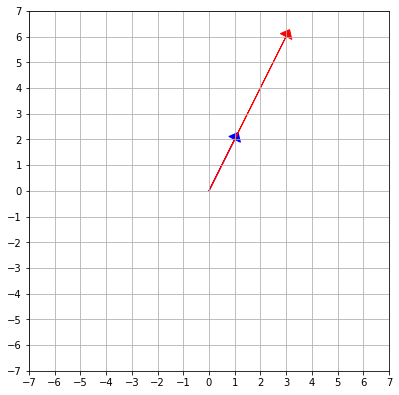

In [92]:
def plot_2d_vector(vector, color):
    return ax.arrow(0,0,vector[0],vector[1], head_width=0.5, head_length=0.3, color=color)

v_1 = np.array([1,2])
v_2 = np.array([3,6])

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.grid()

ax.set_xlim([-7,7])
ax.set_ylim([-7,7])

ax.xaxis.set_major_locator(MultipleLocator(1.00))
ax.yaxis.set_major_locator(MultipleLocator(1.00))

plot_2d_vector(v_1, "blue")
plot_2d_vector(v_2, "red")

plt.show()

#### Observation #1 
The column vectors are on the same line space, when the matrix A is singular. 

#### Observation #2 
If two column vectors are not on the same line space, then the only way the two column vectors could produce $\begin{bmatrix}0\\0\end{bmatrix}$ by linear combination is scaling them by $0$s. But if they are on the same line space like above, then there are multiple sets of specific scalars that can produce $\begin{bmatrix}0\\0\end{bmatrix}$. Let me borrow the matrix above as an example. 

$\begin{array}\\
A =
\begin{bmatrix}
1 & 3 \\ 
2 & 6 \\
\end{bmatrix}
\Longrightarrow
&& 
\vec{v_1} = \begin{bmatrix}1\\2\end{bmatrix}, & \vec{v_2} = \begin{bmatrix}3\\6\end{bmatrix}
\end{array}$

I can scale $\vec{v_1}$ by $-3$ and scale $\vec{v_2}$ by $1$, meaning leaving it as it is. And I do the linear combination, then I get $\begin{bmatrix}0\\0\end{bmatrix}$. 

### The example above in the row picture.

If I picture the matrix $A\vec{x} = \vec{b}$, I will get two parallel lines. 

($\vec{b}$ could be any two constant values) 

### Non-Singular Case (Invertible) 

If $A$ is non-singular (aka invertible), a vector $x$ that satisfies $Ax=0$ could only be $\begin{bmatrix}0\\0\end{bmatrix}$, because of the following:

$\begin{array}{ccc}
Ax=0 & \Longrightarrow & A^{-1} \cdot Ax = A^{-1} \cdot 0 \\
& & Ix = 0 \\ 
& & x = 0
\end{array}$

### Non-Singular Case (Invertible) 
##### How do we find it? 


$
A = 
\begin{bmatrix}
1 & 3 \\ 
2 & 7
\end{bmatrix}$

By definition, the following equations is true, if there's an inverse of matrix A. 

$A^{-1} \cdot A = I \longleftrightarrow  A \cdot A^{-1} = I$ 

I am going to use $A \cdot A^{-1} = I$ for convenience.

We don't know what $A^{-1}$ is, so for now, we will call it B. So we have to find what B is. 

$\begin{matrix}
A && B && I \\ 
\begin{bmatrix}1 & 3 \\ 2 & 7\end{bmatrix}
&
\cdot 
&
\begin{bmatrix}a & b \\ c & d \end{bmatrix}
&
=
&
\begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}
\end{matrix}$

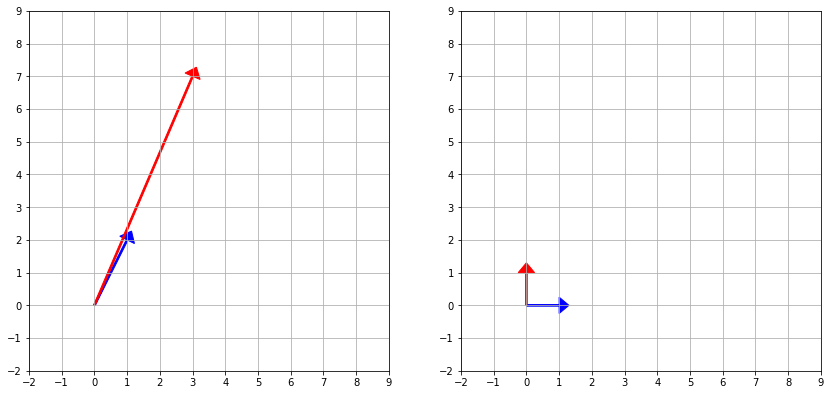

In [141]:
def plot_2d_vector(vector, color, ax):
    return ax.arrow(0,0,vector[0],vector[1], width=0.05, head_width=0.5, head_length=0.3, color=color)

fig = plt.figure(figsize=(5,5))
ax_1 = fig.add_axes([0, 0, 1, 1])
ax_1.grid()
ax_1.set_xlim([-2,9])
ax_1.set_ylim([-2,9])
ax_1.xaxis.set_major_locator(MultipleLocator(1.00))
ax_1.yaxis.set_major_locator(MultipleLocator(1.00))


v_1 = np.array([1,2])
v_2 = np.array([3,7])

plot_2d_vector(v_1, "blue", ax_1)
plot_2d_vector(v_2, "red", ax_1)


ax_2 = fig.add_axes([1.2, 0, 1, 1])
ax_2.grid()
ax_2.set_xlim([-2,9])
ax_2.set_ylim([-2,9])
ax_2.xaxis.set_major_locator(MultipleLocator(1.00))
ax_2.yaxis.set_major_locator(MultipleLocator(1.00))


v_3 = np.array([1,0])
v_4 = np.array([0,1])

plot_2d_vector(v_3, "blue", ax_2)
plot_2d_vector(v_4, "red", ax_2)


plt.show()

$\begin{bmatrix}1 & 3 \\ 2 & 7\end{bmatrix}
\cdot
\begin{bmatrix}a & b \\ c & d \end{bmatrix}
=
\begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}$

**So our purpose is to make the two column vectors on the left picture into ones on the right picture.**

For each column vector on the right picture, we have to use both of the column vectors on the left picture. We would have to scale them by some values and compute the linear combination. 

So this means that we can come up with two sets of system of equations. It is like we are having two target vectors. 

$
\begin{array}{cc}
system\;1 & system\;2 \\
\begin{cases}
a + 3c = 1 \\
2a + 7c = 0 \\
\end{cases}
&
\begin{cases}
b + 3d = 0 \\
2b + 7d = 1 \\
\end{cases}
\end{array}
$


$\left[
\begin{array}{c|c} A_1 & A_2 \\ \hline A_3 & A_4 \end{array}
\right]
\cdot
\left[
\begin{array}{c|c} B_1 & B_2 \\ \hline B_3 & B_4\end{array}
\right]$

So, what does Gauss say? He says, do the Gauss elimination. Then do the back substitution. 

$
\left[
\begin{array}{cc|cc}
1 & 3 &1 & 0\\ 
2 & 7 & 0 & 1\\ 
\end{array}
\right]
\begin{matrix}
&& \\
R_2-2R_1
\end{matrix}
\left[
\begin{array}{cc|cc}
1 & 3 &1 & 0\\ 
0 & 1 & -2 & 1\\ 
\end{array}
\right]
$

$
\begin{bmatrix}
1 & 3 \\
0 & 1 \\
\end{bmatrix}
\cdot
\begin{bmatrix}
a & b \\ c & d
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 \\ -2 & 1
\end{bmatrix}
$

$
\begin{cases}
a + 3c = 1 \\
c = -2
\end{cases}
\; \; \; 
\begin{cases}
b + 3d = 0 \\
d = 1
\end{cases}
$

Therefore, 

$
B = A^{-1} = 
\begin{bmatrix}
7 & -3 \\ 
-2 & 1 \\
\end{bmatrix}
$

In [192]:
# Let's prove it! 

A = np.mat([[1,3], [2,7]])
A

matrix([[1, 3],
        [2, 7]])

I can do it in two different ways. I can just directly calculate the inverse using the software. 

In [188]:
inv_A = inv(A)
inv_A

array([[ 7., -3.],
       [-2.,  1.]])

Or I can solve it in the old fashioned way. 

In [189]:
I = np.mat([[1,0],[0,1]])
solve(A,I)

array([[ 7., -3.],
       [-2.,  1.]])

**But Jodan said keep going!** Guass said, do the gauss elimination to make the matrix row echelon form. However Jordan said, do the elimination until the matrix becomes identity matrix (AKA Reduced Row echelon form).

This is called **Gauss Jordan Elimination**. The logic behind it is the following. We start from this equation. We know matrix $A$ and matrix $I$. But we don't know what matrix $A^{-1}$ is. 

$A \cdot A^{-1} = I$

So just like we did gauss elimination on matrix $A$, we would do Gauss Jordan elimination on matrix $A$ until matrix A becomes $I$. And when we do that, we have to make corresponding changes on to matrix $I$ that is on the right handside of the equation. 

If we make the corresponding changes onto the matrix $I$ on the right handside, then the result would be $A^{-1}$, because 

$I \cdot A^{-1} = A^{-1}$

$A \cdot A^{-1} = I$

$
\begin{bmatrix}
1 & 3 \\ 
2 & 7 \\
\end{bmatrix}
\cdot 
A^{-1}
=
\begin{bmatrix}
1 & 0 \\ 
0 & 1 \\
\end{bmatrix}
\\
\begin{matrix}&&\end{matrix}
\\
\left[
\begin{array}{cc|cc}
1 & 3 & 1 & 0 \\ 
2 & 7 & 0 & 1 \\
\end{array}
\right]
\begin{matrix}
&& \\
R_2 - 2R_1
\end{matrix}
\;
\left[
\begin{array}{cc|cc}
1 & 3 & 1 & 0 \\ 
0 & 1 & -2 & 1 \\
\end{array}
\right]
\begin{matrix}
R_1-3R_2 \\
&&
\end{matrix}
\;
\left[
\begin{array}{cc|cc}
1 & 0 & 7 & -3 \\ 
0 & 1 & -2 & 1 \\
\end{array}
\right]
\\
\begin{matrix}&&\end{matrix}
\\
\begin{bmatrix}
1 & 0 \\ 
0 & 1 \\
\end{bmatrix}
\cdot 
A^{-1}
=
\begin{bmatrix}
7 & -3 \\ 
-2 & 1 \\
\end{bmatrix}
\\
\begin{matrix}&&\end{matrix}
\\
A^{-1}
=
\begin{bmatrix}
7 & -3 \\ 
-2 & 1 \\
\end{bmatrix}
$

#### Gauss-Jordan Elimination 

Gauss-Jordan Elimination is eventually solving two sets of system of equations at once. The example that I showed above has Identity matrix as our target matrix. But Gauss-Jordan Elimination works on other matices as well. 

For example, let's say I am given the following equation. 

$A \cdot B = U$

I don't know what B is, but I would like to know it. 

$
\begin{bmatrix}
1 & 3 \\ 
2 & 5 \\ 
\end{bmatrix}
\cdot 
B
= 
\begin{bmatrix}
7 & 8 \\ 
12 & 14
\end{bmatrix}
$

So it turns out 

$
\left[
\begin{array}{cc|cc}
1 & 3 & 7 & 8 \\ 
2 & 5 & 12 & 14 \\ 
\end{array}
\right]
$

So, what I should do is the following: 

$
1. \; \; A \cdot B = U \\
2. \; \; A^{-1} \cdot A \cdot B = A^{-1} \cdot U \\
3. \; \; I \cdot B = A^{-1} \cdot U \\
4. \; \; B = A^{-1} \cdot U
$

So the step that I want to acheive is the **step number 3**. I would like to **make the matrix A into identity matrix**.

Then the resulting matrix will be the **dot product of $A^{-1}$ and $U$**, which is the **matrix B**. I don't need to know what matrix $A^{-1}$ is.


$
\left[
\begin{array}{cc|cc}
1 & 3 & 7 & 8 \\ 
2 & 5 & 12 & 14 \\ 
\end{array}
\right]
\begin{matrix}
&& \\ 
R_2 - 2R_1
\end{matrix}
\Longrightarrow \; \; 
\left[
\begin{array}{cc|cc}
1 & 3 & 7 & 8 \\ 
0 & -1 & -2 & -2 \\ 
\end{array}
\right]
\begin{matrix}
&& \\ 
-R_2 + (0)R_1
\end{matrix}
$

$
\left[
\begin{array}{cc|cc}
1 & 3 & 7 & 8 \\ 
0 & 1 & 2 & 2 \\ 
\end{array}
\right]
\begin{matrix}
R_1 - 3R_2 \\
&& \\
\end{matrix}
\Longrightarrow \; \; 
\left[
\begin{array}{cc|cc}
1 & 0 & 1 & 2 \\ 
0 & 1 & 2 & 2 \\ 
\end{array}
\right]
$

In [184]:
# Let's check! 

A = np.mat([[1,3],[2,5]])
U = np.mat([[7,8],[12,14]])

solve(A,U)

array([[1., 2.],
       [2., 2.]])

# Lecture 4: Factorization into A = LU

#### Quick Side Note 

Say I have matrix $A$ and matrix $B$. Then I would have a matrix that is a dot product of $A$ and $B$, which is matrix $AB$. Then my question is **what is the inverse of matrix AB**? 

Dot product of **AB** and **the inverse of AB** should produce **Identity Matrix**. Therefore, the inverse of AB should be $B^{-1} \cdot A^{-1}$ because of the following: 

$AB \cdot (B^{-1} A^{-1}) = I$ 

$(B^{-1} A^{-1}) \cdot AB = I$ 

**Another Side Note** 

$A \cdot A^{-1} = I$

Then what is the inverse of $A^T$? Meaning, what is $(A^T)^{-1}$? Well, it is $(A^{-1})^T$

Because of the following. You know when you apply transpose on both sides of the equation, you have to switch the order of the dot product. 

$(A \cdot A^{-1})^T = I^T$

$(A \cdot A^{-1})^T = I$

$(A^{-1})^T \cdot A^T = I$

But at the same time, I can get $I$ from the dot product of $(A^T)^{-1}$ and $A^T$.

$(A^T)^{-1} \cdot A^T = I$

Therefore, 

$(A^{-1})^T = (A^T)^{-1}$

### Factorization into A = LU 

Say, there is a matrix called A. And I would like to make this matrix into a upper triangular matrix. Then what do I do? I will have to do row eliminations. With the computations that I did for the row elimination, I can make row elimination matrices. And the dot product of all these row eliminations matrics is the elimination matrix.  

$E \cdot A = U$

So, if I do the dot product of the elimination matrix and A, I would get the upper triangular matrix. 

But I can also express the equation in another way. I can move the matrix $E$ to the right-hand side of the equation. 

$A = (E)^{-1} \cdot U$

And we will call the inverse of the elimination matrix as matrix $L$. And just like its name, it has the lower triangular form. 

And we prefer $A = (E)^{-1} \cdot U$ over $E \cdot A = U$. Why? Because, for the matrix $L$, we can clearly see what computations were executed on each row. 

In [280]:
(1/3)*(100**3)

333333.3333333333

# Lecture 5: Transposes, Permutations, Spaces R^n

## Transposes 

One important property of transposed matrices is that if you multiply matrix $A$ by $A^T$, it will get you a symetric matrix. And it works for rectangular matrices as well.  

In [400]:
A = np.mat([[1,2,4],[3,3,1]])
A_T = A.T

In [401]:
A

matrix([[1, 2, 4],
        [3, 3, 1]])

In [402]:
A_T

matrix([[1, 3],
        [2, 3],
        [4, 1]])

In [403]:
np.dot(A,A_T)

matrix([[21, 13],
        [13, 19]])

In [404]:
np.dot(A_T,A)

matrix([[10, 11,  7],
        [11, 13, 11],
        [ 7, 11, 17]])

## Permutations

Permutation Matrices $(3x3)$

For $(3x3)$ matrix, you get $3!$ number of permutation matrices. 

$
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 \\
0 & 0 & 1 \\
0 & 1 & 0 \\
\end{bmatrix}
\begin{bmatrix}
0 & 1 & 0 \\
1 & 0 & 0 \\
0 & 0 & 1 \\
\end{bmatrix}\\
\begin{bmatrix}
0 & 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 0 \\
\end{bmatrix}
\begin{bmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 0 & 0 \\
\end{bmatrix}
\begin{bmatrix}
0 & 0 & 1 \\
0 & 1 & 0 \\
1 & 0 & 0 \\
\end{bmatrix}
$

Interesting property of permutation matrix is the following: 

$P^T = P^{-1}$

We know that $P \cdot P^{-1} = I$

And if we following the property above, we can also express the equation as the following: $P \cdot P^T = I$

## Vector Spaces

Let me start with $R^2$ space. 

When I say a space, that means I've got a bunch of vectors, a space of vectors. But not just any bunch of vectors. Space of vectors has to allow me to do the operations that vectors are for. 

I have to be able to add vectors and multiply by numbers. 

I have to be able to take linear combinations. 

$R^2$ vector space -> All 2 dimensional real vectors. 

$
\begin{bmatrix}3 \\ 2 \end{bmatrix}
\begin{bmatrix}0 \\ 0 \end{bmatrix}
\begin{bmatrix}4 \\ 10 \end{bmatrix}
$

and so on....

Let's look at $R^2$ vector space again. $R^2$ vector space is all of two dimmensional vectors. And I should be able to make any vectors within the space from a linear combination of any vectors within the space. 

But let's say, we don't have a vector, [0,0]. Then, if I have to produce [0,0], it is not possible. It means I can't even produce [0,0], because it doesn't exist. 

Originally, one way to produce [0,0] with the vector $\begin{bmatrix}3\\2\end{bmatrix}$is the following. 

$
0 \cdot
\begin{bmatrix} 3 \\ 2 \end{bmatrix} 
+ 
0 \cdot
\begin{bmatrix} 0 \\ 0 \end{bmatrix} 
= 
\begin{bmatrix} 0 \\ 0 \end{bmatrix} 
$

or 

$
\begin{bmatrix} 3 \\ 2 \end{bmatrix} 
+ 
\begin{bmatrix} -3 \\ -2 \end{bmatrix} 
= 
\begin{bmatrix} 0 \\ 0 \end{bmatrix} 
$

But I can't do that. I can't produce $\begin{bmatrix} 0 \\ 0 \end{bmatrix}$ because it doesn't exist. 


$R^3 =$ All vectors with 3 components.  

**Then what is sub-space?**

Let's say I have infinite number of vectors that are on the same line in $R^2$ vector space. With these vectors, I can't fill up the whole $R^2$ vector space with the linear combination. Whatever linear combinations I do, the results will stay on the line. But this is still a vector space. It's got a lot of vectors on the line. It's just not $R^2$ vector space. So this is called a subspace of $R^2$ vector space. 

**Subspaces of $R_2$**

1. All of $R^2$

2. Any line through $\begin{bmatrix}0\\0\end{bmatrix}$


3. Zero vector only. $\begin{bmatrix}0\\0\end{bmatrix}$. We call it Z. 

But why is the third one a subspace of $R^2$? Well, because, let's say I do linear combinations with [0,0] and with another [0,0] with some scalars. And the result will still be [0,0]. The vectors stayed on that space. So it satisfies the rule for a subspace.   

**Subspaces of $R_3$**

1. All of $R^3$

2. Any plane through $\begin{bmatrix}0\\0\\0\end{bmatrix}$ 


3. Any line through $\begin{bmatrix}0\\0\\0\end{bmatrix}$


4. Zero vector only. $\begin{bmatrix}0\\0\\0\end{bmatrix}$.

**Example** 

Say I have the following matrix A: 

$
A =
\begin{bmatrix}
1 & 3 \\
2 & 3 \\ 
4 & 1 \\
\end{bmatrix}
$

So it means I have to 2 column vectors that are 3 dimensional (meaning I have 3 components). 

<IPython.core.display.Javascript object>


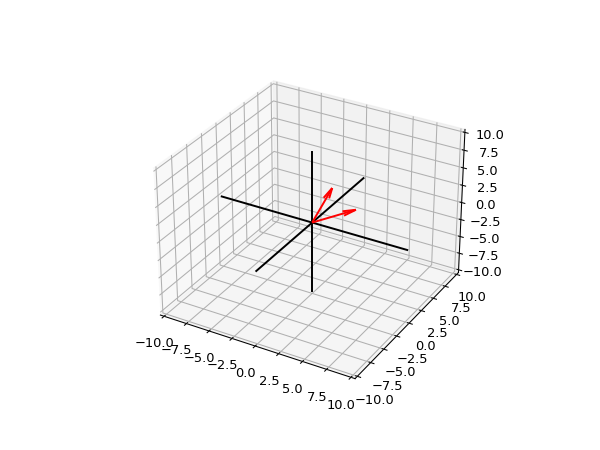

In [511]:
soa = np.array([[0, 0, 0, 1, 2, 4], 
                [0, 0, 0, 3, 3, 1]])

X, Y, Z, U, V, W = zip(*soa)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, color="red")
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])

# X_axis
ax.plot(np.linspace(-10,10,10), np.zeros(10), np.zeros(10), color="black")
# Y_axis
ax.plot(np.zeros(10), np.linspace(-10,10,10), np.zeros(10), color="black")
# Z_axis 
ax.plot(np.zeros(10), np.zeros(10), np.linspace(-10,10,10), color="black")

plt.show()

With these two column vectors, say I do all their combinations. 

And all these combinations form a subspace of $R^3$. This subspace is called **Column Space**, $C(A)$.

This column space certainly passes through the origin. 

<IPython.core.display.Javascript object>


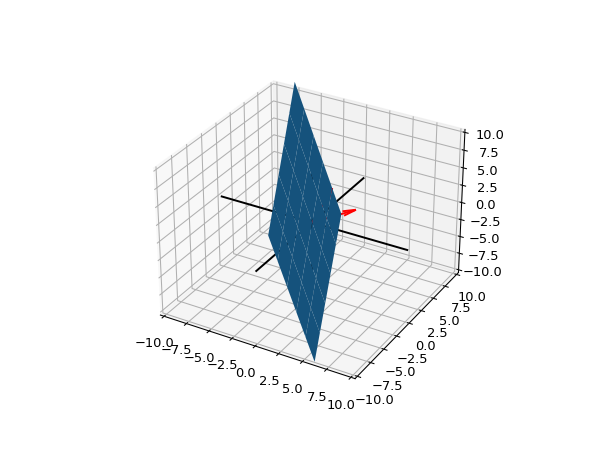

In [510]:
soa = np.array([[0, 0, 0, 1, 2, 4], 
                [0, 0, 0, 3, 3, 1]])

X, Y, Z, U, V, W = zip(*soa)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, color="red")
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])


xx, yy = np.meshgrid(range(-3,3), range(-3,3))

# X_axis
ax.plot(np.linspace(-10,10,10), np.zeros(10), np.zeros(10), color="black")
# Y_axis
ax.plot(np.zeros(10), np.linspace(-10,10,10), np.zeros(10), color="black")
# Z_axis 
ax.plot(np.zeros(10), np.zeros(10), np.linspace(-10,10,10), color="black")


# The equation for the plane is -10x + 11y -3z = 0 
# To rewrite it, (-10x + 11y)/3 = z 

z = ((-10*xx + 11*yy)/3)

ax.plot_surface(xx, yy, z)

plt.show()

#### So, to summarize what vector space is, there are bunch of vectors in some space. And I can add two of vectors and the result stays within that space. Or I can multipy any vectors by a constant, and the result stays in the space as well. 

# Lecture 6: Column Space and Null Space

Let's say I have a plane, $P$ and a line, $L$.

They both pass through the origin, but they are not onto each other. 

And they are both subspaces of $R^3$ space. 

Again, if something to be a subspace, two vectors from that something has to stay on that something after any linear combinations of the two vectors. 

For example, $P$ is a subspace of $R^3$. $L$ is a subspace of $R^3$. 

However, $P \cup L$ is not a subspace of $R^3$. 

Because, let's say I take one vector from the plane, and another vector from the line. Then the resulting vector doesn't always stay on the union of $P$ and $L$. 

<IPython.core.display.Javascript object>


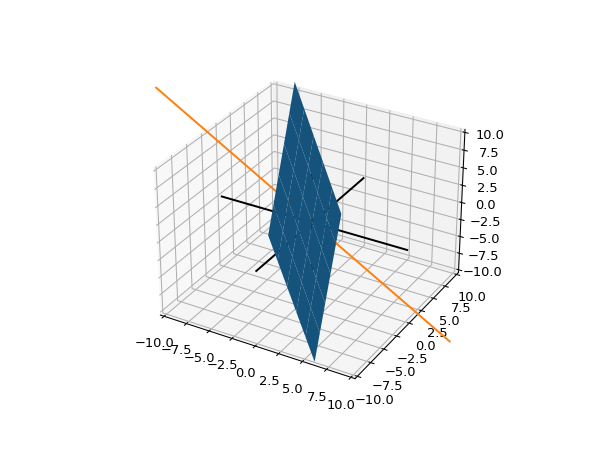

In [519]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])


xx, yy = np.meshgrid(range(-3,3), range(-3,3))

# X_axis
ax.plot(np.linspace(-10,10,10), np.zeros(10), np.zeros(10), color="black")
# Y_axis
ax.plot(np.zeros(10), np.linspace(-10,10,10), np.zeros(10), color="black")
# Z_axis 
ax.plot(np.zeros(10), np.zeros(10), np.linspace(-10,10,10), color="black")


# The equation for the plane is -10x + 11y -3z = 0 
# To rewrite it, (-10x + 11y)/3 = z 

zz = ((-10*xx + 11*yy)/3)

ax.plot_surface(xx, yy, zz)

x = np.linspace(-10,10,10)
y = np.linspace(-10, 10, 10)

z = -2.4*x + 0.3*y 

ax.plot(x,y,z)

plt.show()

$
Ax =
\begin{bmatrix}
1 & 1 & 2 \\
2 & 1 & 3 \\
3 & 1 & 4 \\
4 & 1 & 5 \\
\end{bmatrix}
\cdot 
\begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix}
=
\begin{bmatrix}
b_1 \\ b_2 \\ b_3 \\ b_4
\end{bmatrix}
$

Which $b$'s allow this system to be solved? 

Can solve $Ax = b$ exactly when $b$ is in $C(A)$.

$C(A)$ stands for column (vector) space of A. In other words, it is all possible linear combinations of the column vectors. In other words, it is a subspace of $R^4$. 

Now the questions is, are these three column vectors independent? 

If I take the combinations of those three columns, do I get some three dimensional subspace? 

Can I throw away any columns and have the same column space? 

Yes, I can throw away the third column vector, becuase if I add the first and the second column vectors, I get the third one. I will call the first and the second column vectors as the **pivot columns**.

So I would describe the column space of this matrix as a **two dimensional subspace of $R^4$.** 

**I can't picture how $R^4$ looks like. But when I have one 4-dimensional column vector, I should think of it as a line. When I have two independent 4-dimensional column vectors, and do all the possible linear combinations with them, I should get a plane.**    

## Null Space

$
Ax =
\begin{bmatrix}
1 & 1 & 2 \\
2 & 1 & 3 \\
3 & 1 & 4 \\
4 & 1 & 5 \\
\end{bmatrix}
\cdot 
\begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix}
=
\begin{bmatrix}
0 \\ 0 \\ 0 \\ 0
\end{bmatrix}
$

What is null space? Null space contains all $X$s that solves the equation above. 

**Side Note** 

I want to take a look at this equation below for a moment. 

$
Ax = 
\begin{bmatrix}
1 & 1 & 2 \\
2 & 1 & 3 \\
3 & 1 & 4 \\
\end{bmatrix}
\cdot 
\begin{bmatrix}
x \\ y \\ z
\end{bmatrix}
=
\begin{bmatrix}
0 \\ 0 \\ 0
\end{bmatrix}
$

Matrix $A$ is a singular matrix (AKA no inverse), meaning all three column vectors are not independent. Why? Because I can get the third column vector through linear combination of column vector 1 and 2. In other words, this is a singular matrix. According to Strang's definition, this matrix is singular because I can get some values for (x,y,z) that satisfies the equation other than (0,0,0).  

And I was wondering if the row vectors are independent in this case. And the answer is that the row vectors are not independent as well. 

So in other words, when matrix $A$ is singular, then matrix $A^T$ is singular as well. 

**Another side note** 

On the equation above, we set $b$ as (0,0,0). But does it always have to be (0,0,0)? Well, it's kind of hard to answer it intuitively, but the answer is **YES!**. 

What we are testing from the equation above is whether the matrix is singular or not. In other words, are the column vectors independent from each other. In other words, does the $C(A)$, column (vector) space of $A$ fills up $m$ dimensional space when the column vectors are under $R^m$ space? When column vectors are under $R^m$ space, it means that the column vectors have $m$ components. 

The equation above is to see whether the matrix $A$ is singular or not. If there are multiple soluations of (x,y,z) other than zeros, then the matrix $A$ is singular. If there is no solution other than zeros, then it is not singular. 

But to test whether the matrix is singular or not, does $b$ always has to be zeros? Yes, just like I said above. Suppose I choose $b$ to be a random vector. If the matrix is not singular, then there will always be solutions. But if it's not, then there will be solutions only if that random vector is on a plane or a line which is the column space of the matrix $A$. 

So in order to put some vector on $b$ other than zeros, there are so much to think about and I can't even put the description in words. It is very tedious. So the simplest way to see if the matrix is singular or not is to put zeros on $b$.

$
Ax = 
\begin{bmatrix}
1 & 1 & 2 \\
2 & 1 & 3 \\
3 & 1 & 4 \\
\end{bmatrix}
\cdot 
\begin{bmatrix}
x \\ y \\ z
\end{bmatrix}
=
\begin{bmatrix}
0 \\ 0 \\ 0
\end{bmatrix}
$

**Important**

One more thing that I want to take note of is how this singular matrix looks like in the column picture as well as in the row picture. The reason why I am not acutally plotting is that I don't like the way it comes out here. So we kind of have to picture it in our mind. 

In the column picture, we will have three column vectors. All three vectors are not independent from each other. This specific singular matrix creates column space. And its column space is a plane. All three column vectors will be on this plane. 

In the row picture, there will be three planes that intersect on a line. This line is made up with all the points that satisfies the equation above. Because this matrix is a singular matrix, there are many solutions for (x,y,z). 

And we can interpret this line as a line space that contains all the vectors, (x,y,z)s that satisfies the equation above. And this space is called **Null Space, N(A)**. 

This null space, in this case, is a line. And it passes through the origin. Because certainly the (0,0,0) satisfies the equation above. 

How about the row picture of a matrix that has three independent column vectors? How would it look? Well, since they are indepdendent, the null space would be just (0, 0, 0). So in the row picture, the three planes won't intersect on a line. It will intersect at the point, (0, 0, 0). Of course, one pair of two planes must intersect on a line. Another pair of two planes must intersect on another line. But all three planes do not intersect on one line. (If you are thinking about three parallel lines that don't intersect at all, it's not an appropirate assumption in this case. Because, in order for the graph to look like that, we need a constant added to the equation. But the constant doesn't come into play here.)  

Another thing to take note of is that, when the matrix $A$ is $(m$ x $n)$ matrix, then it's column space, $C(A)$ is in $R^m$ vector space. And its null space, $N(A)$ is in $R^n$ vector space. 

Like I said, the column space is in $R^m$ space. And it's also a subspace of $R^m$ space. And the null space is in $R^n$ space. And it's also a subspace of $R^n$ space. 

**Quick Question** 
I said the null space is a subspace of $R^n$ space. And I said, I must have (0,0,0) on the right hand side of the equation to test whether the matrix is singular or not. But aside from testing it, let's just say I put (1,2,3) on the right hand side. This vector (1,2,3) is definitely on the plane, the column space of $A$.

$
Ax =
\begin{bmatrix}
1 & 1 & 2 \\
2 & 1 & 3 \\ 
3 & 1 & 4 \\ 
\end{bmatrix}
\cdot
\begin{bmatrix}
x \\ y \\ z 
\end{bmatrix}
=
\begin{bmatrix}
1 \\ 2 \\ 3
\end{bmatrix}
$

For this equation, would all the possible solutions for (x,y,z) be a subspace of $R^n$? The answer is **NO!** Because, by the definition of a subspace, it has to include the origin. But this one doesn't. So it wouldn't be a subspace of $R^n$. If we plot the equation above in the row picture, there will be three planes again, intersecting on a line that doesn't pass through the origin. That's why it's not a subspace. 

**Side Note: How to find an equation for Null Space?** 

$
Ax =
\begin{bmatrix}
1 & 1 & 2 \\
2 & 1 & 3 \\ 
3 & 1 & 4 \\ 
\end{bmatrix}
\cdot
\begin{bmatrix}
x \\ y \\ z 
\end{bmatrix}
=
\begin{bmatrix}
0 \\ 0 \\ 0
\end{bmatrix}
$

I'll use this example. I have to turn this equation into a system of equations. And solve them. 

$
\begin{cases}
x + y + 2z = 0 \\ 
2x + y + 3z = 0 \\ 
3x + y + 4z = 0 \\ 
\end{cases}
\Longrightarrow
x = y = -z
$

And this line is going to be one straight line in (x,y,z) coordinates. 

## Lecture 7: Solving $Ax = 0$: Pivot Variables, Special Solutions

Computing the null space $(Ax=0)$

Pivot Variables - Free Variables 

Special Solutions - $rref(A) = R$

$
A = 
\begin{bmatrix}
1 & 2 & 2 & 2 \\ 
2 & 4 & 6 & 8 \\
3 & 6 & 8 & 10 \\
\end{bmatrix}
$

$Ax = 0$

I want to know what solutions works for $x$. 

$
\begin{bmatrix}
1 & 2 & 2 & 2 \\ 
2 & 4 & 6 & 8 \\
3 & 6 & 8 & 10 \\
\end{bmatrix}
\cdot 
\begin{bmatrix}
a \\ b \\ c \\ d \\
\end{bmatrix}
= 
\begin{bmatrix}
0 \\ 0 \\ 0 \\
\end{bmatrix}
$

In order to figure out the solutions for $x$, (AKA the null space in this case, since the zeros are on the right hand side), we have to do the Gaussian Elimination. So we are eventually making matrix $A$ into a **Echelon Form** (or row echelon form). Even if we change it into Echelon form, the null space doesn't change. 

$
\begin{bmatrix}
1 & 2 & 2 & 2 \\ 
2 & 4 & 6 & 8 \\
3 & 6 & 8 & 10 \\
\end{bmatrix}
\Longrightarrow
\begin{bmatrix}
1 & 2 & 2 & 2 \\ 
0 & 0 & 2 & 4 \\
3 & 6 & 8 & 10 \\
\end{bmatrix}
\Longrightarrow
\begin{bmatrix}
1 & 2 & 2 & 2 \\ 
0 & 0 & 2 & 4 \\
0 & 0 & 2 & 4 \\
\end{bmatrix}
\Longrightarrow
\begin{bmatrix}
1 & 2 & 2 & 2 \\ 
0 & 0 & 2 & 4 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}
$

I will call this echelon form of A, U. 

$
U = 
\begin{bmatrix}
1 & 2 & 2 & 2 \\ 
0 & 0 & 2 & 4 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}
$

And here, the pivots are $1$ & $2$. 

**Definition of Pivot**: If a matrix is in row-echelon form, then the first nonzero entry of each row is called a **pivot**. And the columns in which pivots appear are called **pivot columns**. 

And then the rank of the matrix $A$ is 2. This is determined by the number of pivots in the row echelon form. The row echelon form of matrix $A$ has two pivots. That's why its rank is 2. 

The **definition of rank** is the following. In linear algebra, the rank of a matrix $A$ is the dimension of the vector space generated by its columns. This corresponds to the maximal number of linearly independent columns of $A$. 

So, in some cases, it is obvious to see how many independent columns there are in a matrix $A$. So you will know the rank of the matrix right away. However, most of the time, it is not obvious. Therefore, you have to turn the matrix $A$ into a row echelon form. Then you will count the number of pivots and that will be the rank of the matrix $A$. 

Let's take a look at the following example. I'll use this $(3x3)$ matrix as an example for the sake of simplicity.

$
A = 
\begin{bmatrix}
1 & 1 & 2 \\
2 & 1 & 3 \\
3 & 1 & 4 \\ 
\end{bmatrix}
$

The colum vectors in the matrix $A$ are not all independent from each other. Only two of them are. 
I will turn this matrix into row echelon form. 

$
\Longrightarrow
\begin{bmatrix}
1 & 1 & 2 \\
0 & -1 & -1 \\
0 & -2 & -2 \\
\end{bmatrix}
\Longrightarrow
\begin{bmatrix}
1 & 1 & 2 \\ 
0 & -1 & -1 \\ 
0 & 0 & 0 \\
\end{bmatrix}
$

See how many pivots there are. There are 2 pivots. Therefore, **the rank of the matrix $A$ is 2.** And this really corresponds to the definition of rank. Matrix $A$ consists of 3 column vectors and only two of them are independent. And the definition of rank says it tells the maximal number of linearly independent columns of $A$. And if we create the column space, $C(A)$ of the matrix $A$, we get the rank number of dimensions. And that's exactly what it does.  

**Let me try this same process with $(3x4)$ matrix.** 

$
A = 
\begin{bmatrix}
1 & 2 & 2 & 2 \\
2 & 4 & 6 & 8 \\
3 & 6 & 8 & 10 \\ 
\end{bmatrix}
$

This matrix $A$ has 2 linearly independent columns. Therefore, its rank should be 2. But let's say we don't know that. So in order to figure out its rank, in other words, how many independent columns there are, we have to turn this matrix into row echelon form. 

$
\Longrightarrow
\begin{bmatrix}
1 & 2 & 2 & 2 \\
0 & 0 & 2 & 4 \\ 
3 & 6 & 8 & 10 \\ 
\end{bmatrix}
\Longrightarrow
\begin{bmatrix} 
1 & 2 & 2 & 2 \\ 
0 & 0 & 2 & 4 \\
0 & 0 & 2 & 4 \\ 
\end{bmatrix} 
\Longrightarrow
\begin{bmatrix}
1 & 2 & 2 & 2 \\ 
0 & 0 & 2 & 4 \\ 
0 & 0 & 0 & 0 \\
\end{bmatrix}
$

I will call this row echelon form of matrix $A$ matrix $U$. 

The matrix $U$ has two pivots. $U_{1,1}$, $U_{2,3}$. So the rank of matrix $A$ is 2. 

In the matrix $U$, the column vectors that have pivots are called **pivot columns** and the ones that don't are called **free columns**. When the given matrix A is (mxn) matrix, then there will always be rank number of pivot columns and $n-rank$ number of free columns. 

**Definition of Row Echelon Form**

A matrix is in row echelon form if it satisfies the following properties 1, 2, and 3. Furthermore a matrix is in reduced row echelon form if it satisfies all of the following properties:

1. If there are any zero rows, they must be at the bottom of the matrix.

2. The first nonzero entry from the left of a nonzero row is a 1, which is also called the leading one of that row.

3. The leading one for each nonzero row appears to the right and below any leading ones in the previous rows.

4. For a column with a leading one, the other entries in that column are zero.

#### Again, the main goal of this lecture is to solve $Ax = 0$, which is finding the null space.

Since we have turned the matrix into a row echelon form, we can express the equation as the following: 

$ref(A)x = 0$

Matrix $A$ is now in the row echelon form. So we can do the back substitution to find the possible vectors for x, which is the null space. 

$
\begin{bmatrix}
1 & 2 & 2 & 2 \\ 
0 & 0 & 2 & 4 \\ 
0 & 0 & 0 & 0 \\
\end{bmatrix}
\cdot
\begin{bmatrix}
a \\ b \\ c \\ d
\end{bmatrix}
=
\begin{bmatrix}
0 \\ 0 \\ 0
\end{bmatrix}
$

$
\begin{cases}
a + 2b + 2c + 2d = 0\\
2c + 4d = 0 \\
\end{cases}
$

There are going to be many solutions for x that satisfies (a,b,c,d). I won't solve them, because there are too many of them. 
So, it is almost impossible to calculate all the possible solutions. So there's another way to do get the solutions. 

The another way is to solve $rref(A) \cdot x= 0$

So, what we have to do is to turn $ref(A)$ into $rref(A)$. This is called **reduced row echelon form**. 

$
ref(A) = 
\begin{bmatrix}
1 & 2 & 2 & 2 \\ 
0 & 0 & 2 & 4 \\ 
0 & 0 & 0 & 0 \\
\end{bmatrix}
\Longrightarrow
\begin{bmatrix}
1 & 2 & 2 & 2 \\ 
0 & 0 & 2 & 4 \\ 
0 & 0 & 0 & 0 \\
\end{bmatrix}
\Longrightarrow
\begin{bmatrix}
1 & 2 & 0 & -2 \\ 
0 & 0 & 2 & 4 \\ 
0 & 0 & 0 & 0 \\
\end{bmatrix}
\Longrightarrow 
\begin{bmatrix}
1 & 2 & 0 & -2 \\ 
0 & 0 & 1 & 2 \\ 
0 & 0 & 0 & 0 \\
\end{bmatrix}
$

$
rref(A) = 
\begin{bmatrix}
1 & 2 & 0 & -2 \\ 
0 & 0 & 1 & 2 \\ 
0 & 0 & 0 & 0 \\
\end{bmatrix}
$

$
rref(A) \cdot x = 0 
\Longrightarrow
\begin{bmatrix}
1 & 2 & 0 & -2 \\ 
0 & 0 & 1 & 2 \\ 
0 & 0 & 0 & 0 \\
\end{bmatrix}
\cdot
\begin{bmatrix}
a \\ b \\ c \\ d
\end{bmatrix}
= 
\begin{bmatrix}
0 \\ 0 \\ 0 \\
\end{bmatrix}
$

But I would like to do the column exchange for $rref(A)$ to get a certain form. Then surely, I will have to do the row exchange for $x$ as well. 

$
\left[
\begin{array}{cc|cc}
1 & 0 & 2 & -2 \\ 
0 & 1 & 0 & 2 \\ 
\hline
0 & 0 & 0 & 0 \\
\end{array}
\right]
\cdot
\begin{bmatrix}
a \\ c \\ b \\ d
\end{bmatrix}
= 
\begin{bmatrix}
0 \\ 0 \\ 0 \\
\end{bmatrix}
$

To rewrite that 

$
\left[
\begin{array}{c|c}
I & F \\  
\hline
0 \ 0 & 0 \ 0
\end{array}
\right]
\cdot
\begin{bmatrix}
a \\ c \\ b \\ d
\end{bmatrix}
= 
\begin{bmatrix}
0 \\ 0 \\ 0 \\
\end{bmatrix}
\Longrightarrow
\left[
\begin{array}{c|c}
I & F \\  
\hline
0 \ 0 & 0 \ 0
\end{array}
\right]
\cdot
x
= 
\begin{bmatrix}
0 \\ 0 \\ 0 \\
\end{bmatrix}
$

Let's suppose I have the following equation. 

$
\begin{bmatrix}
I & F 
\end{bmatrix}
$ is a (2x4) matrix.

$
\begin{bmatrix}
I & F 
\end{bmatrix}
\cdot 
x =
\begin{bmatrix}
0 & 0 \\ 
0 & 0 \\
\end{bmatrix}
$

What should the $x$ be now? $x$ should be the following to satsify the equation. 

$
\begin{bmatrix}
I & F 
\end{bmatrix}
\cdot 
\begin{bmatrix}
-F \\ I
\end{bmatrix}
=
\begin{bmatrix}
0 & 0 \\ 
0 & 0 \\
\end{bmatrix}
$

Then what should be the answer for our original equation? 


$
\left[
\begin{array}{c|c}
I & F \\  
\hline
0 \ 0 & 0 \ 0
\end{array}
\right]
\cdot
\begin{bmatrix}
-F_{i,1} \\ I_{i,1}
\end{bmatrix}
= 
\begin{bmatrix}
0 \\ 0 \\ 0 \\
\end{bmatrix}
\ \ \ \ \
and 
\ \ \ \ \
\left[
\begin{array}{c|c}
I & F \\  
\hline
0 \ 0 & 0 \ 0
\end{array}
\right]
\cdot
\begin{bmatrix}
-F_{i,2} \\ I_{i,2}
\end{bmatrix}
= 
\begin{bmatrix}
0 \\ 0 \\ 0 \\
\end{bmatrix}
$

And if $\begin{bmatrix}-F_{i,1} \\ I_{i,1}\end{bmatrix}$ and $\begin{bmatrix}-F_{i,2} \\ I_{i,2}\end{bmatrix}$ satisfy the equation, then any multiples of those two vectors also satisfy the equation. 

Therefore, the null space of the matrix $A$ is $c \cdot \begin{bmatrix}-F_{i,1} \\ I_{i,1}\end{bmatrix}$ and $d \cdot \begin{bmatrix}-F_{i,2} \\ I_{i,2}\end{bmatrix}$. They are line spaces. But the union of the two null spaces doesn't satisfy the equation. 

## Let's recap what we have done so far. 

I have matrix $A$ as the following: 

$
A = 
\begin{bmatrix}
1 & 2 & 2 & 2 \\
2 & 4 & 6 & 8 \\
3 & 6 & 8 & 10 \\ 
\end{bmatrix}
$

And we are interested in finding the null space. 

$Ax = 0$

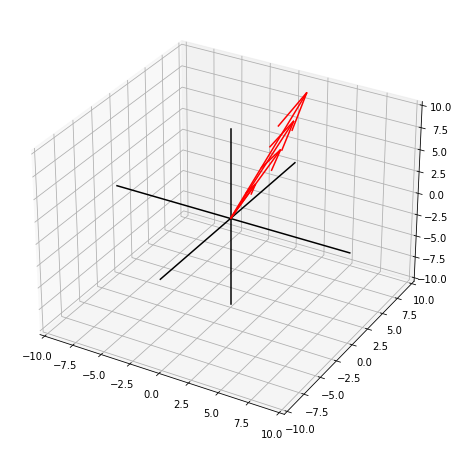

In [26]:
soa = np.array([[0, 0, 0, 1, 2, 3], 
                [0, 0, 0, 2, 4, 6],
                [0, 0, 0, 2, 6, 8], 
                [0, 0, 0, 2, 8, 10]])

X, Y, Z, U, V, W = zip(*soa)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, color="red")
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])

# X_axis
ax.plot(np.linspace(-10,10,10), np.zeros(10), np.zeros(10), color="black")
# Y_axis
ax.plot(np.zeros(10), np.linspace(-10,10,10), np.zeros(10), color="black")
# Z_axis 
ax.plot(np.zeros(10), np.zeros(10), np.linspace(-10,10,10), color="black")

plt.show()

As you can see, this is really hard to see what is going on. Therefore, we change the column vectors in matrix $A$ into a certain form that is easier to see. This certain form that I am talking about is the row echelon form. The row echelon form, as you will see, is easier to perceive what is going on, while the values for the null space remains constant. 

$
rref(A) =
\begin{bmatrix}
1 & 2 & 2 & 2 \\ 
0 & 0 & 2 & 4 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}
$

Let's plot this row echelon form of A.

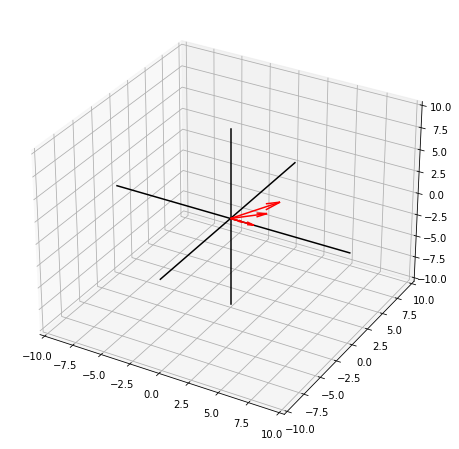

In [27]:
soa = np.array([[0, 0, 0, 1, 0, 0], 
                [0, 0, 0, 2, 0, 0],
                [0, 0, 0, 2, 2, 0], 
                [0, 0, 0, 2, 4, 0]])

X, Y, Z, U, V, W = zip(*soa)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, color="red")
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])

# X_axis
ax.plot(np.linspace(-10,10,10), np.zeros(10), np.zeros(10), color="black")
# Y_axis
ax.plot(np.zeros(10), np.linspace(-10,10,10), np.zeros(10), color="black")
# Z_axis 
ax.plot(np.zeros(10), np.zeros(10), np.linspace(-10,10,10), color="black")

plt.show()

Since the z-cordinate values for all the column vectors are zero, we can even plot them on a xy-coordinate. 

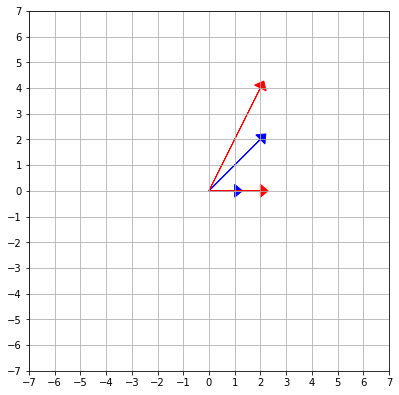

In [28]:
def plot_2d_vector(vector, color):
    return ax.arrow(0,0,vector[0],vector[1], head_width=0.5, head_length=0.3, color=color)

pivot_1 = np.array([1,0])
pivot_2 = np.array([2,2])
free_1 = np.array([2,0])
free_2 = np.array([2,4])

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.grid()

ax.set_xlim([-7,7])
ax.set_ylim([-7,7])

ax.xaxis.set_major_locator(MultipleLocator(1.00))
ax.yaxis.set_major_locator(MultipleLocator(1.00))

plot_2d_vector(pivot_1, "blue")
plot_2d_vector(pivot_2, "blue")

plot_2d_vector(free_1, "red")
plot_2d_vector(free_2, "red")

plt.show()

The blue columns are the pivot columns and the red columns are the free columns. I have two pivot columns. And with these two pivot columns, I can get the free columns. In fact I can get any column vectors on this plane. So essentially, I have two independent column vectors. 

1) Like I have shown above, row echelon form allows us to see how many independent columns there are in a matrix both visually and mathematically. That's one reason why we use it. 

2) Another reason is that it allows us to do back substitution with simplified equations. But still, there might be two many possible answers. So it is not so practical to use the back substitution in this case. (Instead, we use the **reduced row echelon form** to get the possible values that satisfy the equation.) 

3) The last reason to use row echelon form is that it is just one step before making reduced row echelon form. 

### One more similar example: 

Let me try this matrix. 

$
A = 
\begin{bmatrix}
0 & 0 & 2 & -2 \\ 
0 & 1 & 0 & 2 \\ 
1 & 0 & 0 & 0 \\
\end{bmatrix} 
$

Therefore, 

$
ref(A) = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\ 
0 & 1 & 0 & 2 \\ 
0 & 0 & 2 & -2 \\
\end{bmatrix} 
$

It has got 3 pivots. Which means its rank is 3. Therefore, we have three independent column vectors. 

<IPython.core.display.Javascript object>


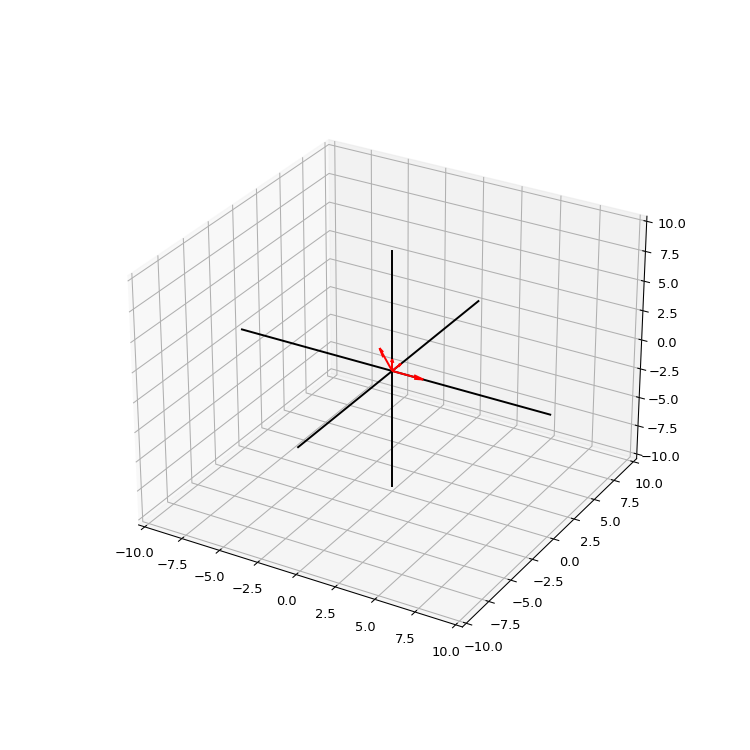

In [32]:
%matplotlib notebook
soa = np.array([[0, 0, 0, 0, 0, 1], 
                [0, 0, 0, 0, 1, 0],
                [0, 0, 0, 2, 0, 0], 
                [0, 0, 0, -2, 2, 0]])

X, Y, Z, U, V, W = zip(*soa)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, color="red")
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])

# X_axis
ax.plot(np.linspace(-10,10,10), np.zeros(10), np.zeros(10), color="black")
# Y_axis
ax.plot(np.zeros(10), np.linspace(-10,10,10), np.zeros(10), color="black")
# Z_axis 
ax.plot(np.zeros(10), np.zeros(10), np.linspace(-10,10,10), color="black")

plt.show()

Notice, I have plotted matrix $A$, not $ref(A)$. The plot above, shows that the three vector columns, $\begin{bmatrix}0\\1\\0\end{bmatrix},\begin{bmatrix}2\\0\\0\end{bmatrix},\begin{bmatrix}-2\\2\\0\end{bmatrix}$, from matrix $A$ all lie on a same plane. One of the three vector columns could be produced through a linear combination of other two column vectors. Therefore, we have only two independent column vectors from these three. However, we have one more column vector, $\begin{bmatrix}0\\0\\1\end{bmatrix}$, sticking out of the plane. This last column vector adds one more dimension to the column space of matrix A. Therefore, we can say matrix $A$ has three independent column vectors and that fact is proved by its rank which is 3. 

And also, each column vector has got 3 components. Therefore, the column vectors are in $R^3$ vector space. And the column space of matrix A fills up the whole $R^3$ vector space, because it has got 3 independent column vectors. 

#### Thinking more critically. 

$
A = 
\begin{bmatrix}
0 & 0 & 2 & -2 \\ 
0 & 1 & 0 & 2 \\ 
1 & 0 & 0 & 0 \\
\end{bmatrix} 
$

Notice that matrix $A$ is a rectangular matrix. So the rule for square matrix doesn't apply here. Suppose there is (3x3) square matrix. And all of the column vectors are independent from each other. Then the only solution for $x$ that satifies $Ax=0$ is (0,0,0).  

However, that rule doesn't apply for this specific rectangular matrix A. Let me first rewrite this matrix as $ref(A)$.

$
ref(A) = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\ 
0 & 1 & 0 & 2 \\ 
0 & 0 & 1 & -1 \\
\end{bmatrix} 
$

In $R^3$ vector space, we have 4 column vectors and 3 of them are independent. Would (0,0,0,0) be the only solution for the equation, $ref(A)x=0$? No there are many solutions. Take a look at matrix $A$ again. The first column vector is the only vector that sticks out to the z-coordinate. I will assign 0 for its scalar. And for the rest of column vectors, I can create so many combinations of scalars which will produce 0 through linear combinations. That's because these three column vectors are all on a same plane. 


**Last thing I want to add** 

$
Ax = 0 
\Longrightarrow
\left[
\begin{array}{ccc|c}
1 & 1 & 2 & 0 \\
2 & 1 & 3 & 0 \\
3 & 1 & 4 & 0 \\ 
\end{array}
\right]
$

This is matrix A with the rank of 2. So in the row picture, there are three planes intersecting at a line, which is the null space. 
If you actually do the calculation,  $z = -x = -y$ is the intersection line on the row picture. 

Say I have changed matrix A into a reduced echelon form. 

$
ref(A)x = 0 
\Longrightarrow
\left[
\begin{array}{ccc|c}
1 & 1 & 2 & 0 \\
0 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 \\ 
\end{array}
\right]
$

Of course, the column picture changes from $Ax = 0$. The row picture changes as well. But interestingly enough, the intersection doesn't change. It means that the null space doesn't change even if we change matrix A into its row echelon form. Furthermore, turning it into a reduced row echelon form doesn't affect the null space either. That is really cool. 

**Out of Curiosity** 

We set the equation above, in which linear combinations of three column vectors reach the target column vector, (0,0,0). I was wondering whether the combinations of scalars still doesn't change if our target vector is something else other than zero vector. I set (1,2,3) as the target vector for this experiment. Because I know this vector is surely on the column space of A. 

$
Ax = b 
\Longrightarrow
\left[
\begin{array}{ccc|c}
1 & 1 & 2 & 1 \\
2 & 1 & 3 & 2 \\
3 & 1 & 4 & 3 \\ 
\end{array}
\right]
$

However, something that I didn't expect happened. When I changed the matrix A into the row echelon form, the target vector is no longer (1,2,3). It is something else. 

$
ref(A)x = b_1 
\Longrightarrow
\left[
\begin{array}{ccc|c}
1 & 1 & 2 & 1 \\
0 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 \\ 
\end{array}
\right]
$

But if I draw the row picture of both of the cases, the intersections are the same. This means that combinations of the scalars didn't change. 

## Lecture 8: Solving $Ax=b$: Row Reduced Form R

$Ax = b$

Augmented Matrix Form

$
\left[
\begin{array}{cccc|c}
1 & 2 & 2 & 2 & b_1 \\
2 & 4 & 6 & 8 & b_2 \\
3 & 6 & 8 & 10 & b_3\\
\end{array}
\right]
$

I turn matrix $A$ into $ref(A)$. Then the vector $b$ will change according to any changes I have made for $A$. 

$
\left[
\begin{array}{cccc|c}
1 & 2 & 2 & 2 & b_1 \\
0 & 0 & 2 & 4 & b_2-2b_1 \\
0 & 0 & 0 & 0 & b_3-b_2-b_1\\
\end{array}
\right]
$

Notice that $b_3-b_2-b_1 = 0$

Suppose $b = \begin{bmatrix}1 \\ 5 \\ 6 \end{bmatrix}$

Then the augmented matrix goes as the following: 

$
\left[
\begin{array}{cccc|c}
1 & 2 & 2 & 2 & 1 \\
0 & 0 & 2 & 4 & 3 \\
0 & 0 & 0 & 0 & 0 \\
\end{array}
\right]
$

### Solvability Condition on $b$

Let's talk about solvability. What is the condition on $b$ for $Ax = b$ to be solvable. 

1. $Ax = b$ is solvable when $b$ is in the column space of $A$, $C(A)$. 

2. In other words, if a combination of rows of $A$ gives zero row, then the same combination of entries of $b$ must give 0. 

Well, these 2 statements basically mean the same. But how they are the same is not intuitive. So the goal of this lecture is to make sense of the two statements. 

To find complete solution to $Ax=b$

$
\begin{array}{ll}
1. \ X_{particular}: & Set \ all \ free \ variables \ equal \ to \ zero \\
& Then \ solve \ Ax=b \ for \ the \ pivot \ variables
\end{array} 
$

Of course I can use any number for free variables. But for simplicity, we choose zeros. 

Let's apply that to our example augmented matrix. 

$
\left[
\begin{array}{cccc|c}
1 & 2 & 2 & 2 & 1 \\
0 & 0 & 2 & 4 & 3 \\
0 & 0 & 0 & 0 & 0 \\
\end{array}
\right]
$

Then we get the following system of equaitons. 

$
\begin{cases}
x_1 + 2x_3 = 1 \\
2x_3 = 3
\end{cases}
\Longrightarrow
\begin{array}\\
x_1 = -2 \\ 
x_3 = \frac{3}{2}
\end{array}
\Longrightarrow
X_p = 
\begin{bmatrix}
-2 \\ 0 \\ \frac{3}{2} \\ 0
\end{bmatrix}
$

Good! But this is only one solution that satisfies the equation. I want all of the solutions. So we go onto the second step. 

2. Find the null space of A, $Null(A)$. And add that to $X_p$. This will be the all the possible solutions for $x$ that satisfy the equation, $Ax=b$

$A(X_p + null(A)) = b$

This equation make sense because the following procedure produces the equation above. 

$
\begin{array}{ll}
& A \cdot x_p = b \\
+ & A \cdot null(A) = 0 \\ 
\hline
& A(x_p + null(A)) = b
\end{array} 
$


**Note that $(x_p + null(A))$ is not the only solution. There could be many other $x_p$s.**

# Complete this example with the null space. 

We need to make make $ref(A)$ into $rref(A)$ to get the null space. 

$ref(A) \cdot x = \widehat{b}$

$ref(A) \cdot x = 0$

$rref(A) \cdot = 0$

$
\left[
\begin{array}{cccc|c}
1 & 0 & 2 & -2 & 0 \\ 
0 & 1 & 0 & 2 & 0\\ 
0 & 0 & 0 & 0 & 0\\
\end{array}
\right]
$

And we can calulate the null space. 

We get $c \cdot \begin{bmatrix}-2 \\ 1 \\ 0 \\ 0\end{bmatrix}$ and $d \cdot \begin{bmatrix}2 \\ 0 \\ -2 \\ 1\end{bmatrix}$

$
\begin{array}{ll}
& A \cdot cX_1 = 0 \\ 
+ & A \cdot dX_2 = 0 \\
\hline
& A (cX_1 + dX_2) = 0 
\end{array}
$

Therefore, 

$
\begin{bmatrix}
1 & 2 & 0 & -2 \\ 
0 & 0 & 1& 2 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}
\cdot 
(C \cdot \begin{bmatrix}-2 \\ 1 \\ 0 \\ 0\end{bmatrix}
+ D \cdot \begin{bmatrix}2 \\ 0 \\ -2 \\ 1\end{bmatrix}) = 
\begin{bmatrix}0\\0\\0\end{bmatrix}
$




So, for this case, the null space is not going to be a line space. It is not going to be a 1 dimensional vector space in $R^4$ vector space. It is going to be a plane. It is going to be a 2-dimensional vector space.  

### Let me try another example with (3x3) matrix and plot it. 

$
A = 
\begin{bmatrix} 
1 & 2 & 2 \\ 
2 & 4 & 6 \\ 
3 & 6 & 8 \\ 
\end{bmatrix}
\ \ \ and \ \ \ 
b = 
\begin{bmatrix}
1 \\ 5 \\ 6 
\end{bmatrix}
$

Therefore, we have the following equation. 

$
Ax = b \ \ \ 
\Longrightarrow \ \ \ 
\left[
\begin{array}{ccc|c} 
1 & 2 & 2 & 1 \\ 
2 & 4 & 6 & 5 \\ 
3 & 6 & 8 & 6 \\ 
\end{array}
\right]
$

1) Then we proceed to the step number 1. Get $X_{particular}.$ To make the calculation easier, we turn matrix $A$ into $ref(A)$. Then we will have pivot variables and free variables. Whatever changes I make on matrix $A$ will affect $b$ accordingly.

$
ref(A) \cdot x = \widehat{b} \ \ \ 
\Longrightarrow \ \ \ 
\left[
\begin{array}{ccc|c} 
1 & 2 & 2 & 1 \\ 
0 & 0 & 2 & 3 \\ 
0 & 0 & 0 & 0 \\ 
\end{array}
\right]
$

Setting the free variables equal to zero, we get the following $X_{particular}$.

$
X_p = 
\begin{bmatrix}
-2 \\ 0 \\ \frac{3}{2}
\end{bmatrix}
$

2) Now, we go on to the second step. We have to get the null space of $A$, $Null(A)$. To do so, we have to do the Gauss-Jordan elimination, which will produce $rref(A)$. Again, this is not necessary, but it just makes the calculation easier. 

$
rref(A) \cdot x = 0 \ \ \ 
\Longrightarrow \ \ \  
\left[
\begin{array}{ccc|c} 
1 & 2 & 0 & 0 \\ 
0 & 0 & 1 & 0 \\ 
0 & 0 & 0 & 0 \\ 
\end{array}
\right]
$

Then we get the null space of A. $Null(A) = c \cdot \begin{bmatrix}-2 \\ 1 \\ 0 \end{bmatrix}$

Now, everything is all set. $(X_p + Null(A))$ is the all possible solutions for x that satisfy $Ax=b$

$A(X_p + Null(A)) = b$

### Let's plot them now. 


$
Ax = b \ \ \ 
\Longrightarrow \ \ \ 
\left[
\begin{array}{ccc|c} 
1 & 2 & 2 & 1 \\ 
2 & 4 & 6 & 5 \\ 
3 & 6 & 8 & 6 \\ 
\end{array}
\right] 
\ \ \ \ \ \ 
\Longrightarrow
\ \ \ \ \ \ 
ref(A) \cdot x = \widehat{b} \ \ \ 
\Longrightarrow \ \ \ 
\left[
\begin{array}{ccc|c} 
1 & 2 & 2 & 1 \\ 
0 & 0 & 2 & 3 \\ 
0 & 0 & 0 & 0 \\ 
\end{array}
\right]
$

If we turn matrix $A$ into a row reduced form, we can see that the rank of the matrix is 2. So we have three column vectors, only two of which are independent. So we can plot this equation, $ref(A) \cdot x =\widehat{b}$ on a 2-dimensional xy-coordinate.  


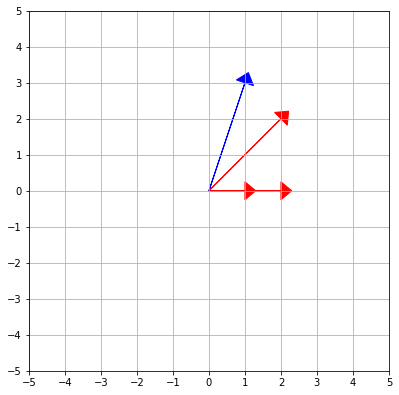

In [7]:
def plot_2d_vector(vector, color):
    return ax.arrow(0,0,vector[0],vector[1], head_width=0.5, head_length=0.3, color=color)

v_1 = np.array([1,0])
v_2 = np.array([2,0])
v_3 = np.array([2,2])
b = np.array([1,3])

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.grid()

ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

ax.xaxis.set_major_locator(MultipleLocator(1.00))
ax.yaxis.set_major_locator(MultipleLocator(1.00))

plot_2d_vector(v_1, "red")
plot_2d_vector(v_2, "red")
plot_2d_vector(v_3, "red")
plot_2d_vector(b, "blue")

plt.show()

As you can see, our target vector $b$ is on the columns space of $A$, $C(A)$. So there are so many different linear combinations of the three column vectors that will produce the target vector. We would like to find them all, not just one.  

## Now, let's plot the null space, the line space in this case. 

Then show how X particular + null space looks like. 

Let me plot the row picture of the equation, $ref(A) \cdot x = \widehat{b}$

$
\left[
\begin{array}{ccc|c}
1 & 2 & 3 & 2 \\
0 & 0 & 2 & 3 \\ 
0 & 0 & 0 & 0 \\ 
\end{array}
\right]
$

I will have two planes in the column picture. Where these two planes intersect is the null space, $Null(A) = c \cdot \begin{bmatrix}-2 \\ 1 \\ 0\end{bmatrix}$

<IPython.core.display.Javascript object>


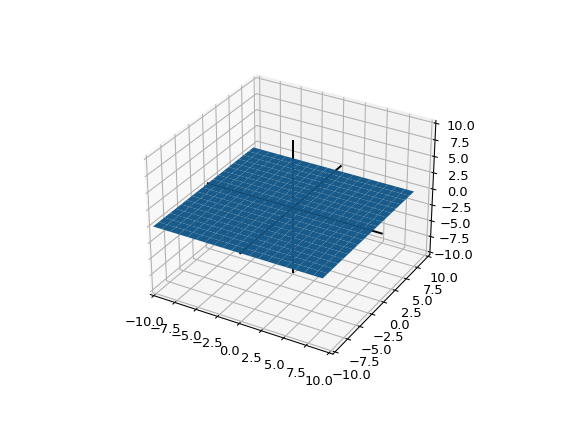

In [110]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])


xx, yy = np.meshgrid(range(-10,10), range(-10,10))

# X_axis
ax.plot(np.linspace(-10,10,10), np.zeros(10), np.zeros(10), color="black")
# Y_axis
ax.plot(np.zeros(10), np.linspace(-10,10,10), np.zeros(10), color="black")
# Z_axis 
ax.plot(np.zeros(10), np.zeros(10), np.linspace(-10,10,10), color="black")


# The equation for the plane is -10x + 11y -3z = 0 
# To rewrite it, (-10x + 11y)/3 = z 

z = (0*xx + 0*yy)

ax.plot_surface(xx, yy, z)

plt.show()

<IPython.core.display.Javascript object>


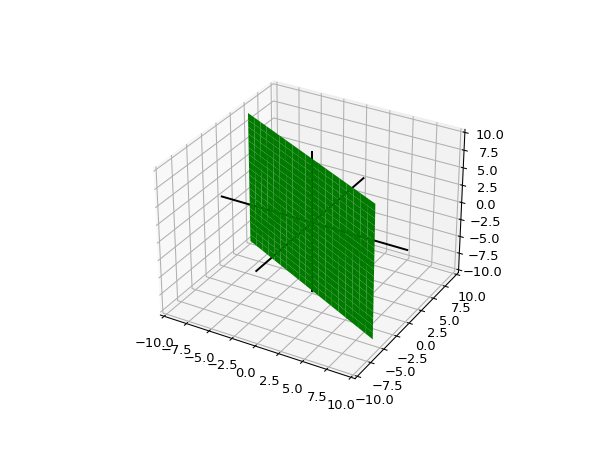

In [111]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])


xx, zz = np.meshgrid(range(-10,10), range(-10,10))

# X_axis
ax.plot(np.linspace(-10,10,10), np.zeros(10), np.zeros(10), color="black")
# Y_axis
ax.plot(np.zeros(10), np.linspace(-10,10,10), np.zeros(10), color="black")
# Z_axis 
ax.plot(np.zeros(10), np.zeros(10), np.linspace(-10,10,10), color="black")


# The equation for the plane is -10x + 11y -3z = 0 
# To rewrite it, (-10x + 11y)/3 = z 

y = -(1/2)*xx + 0*zz

ax.plot_surface(xx, y, zz, color="green")

plt.show()

These two planes above will intersect and the following line space is that intersection. 

<IPython.core.display.Javascript object>


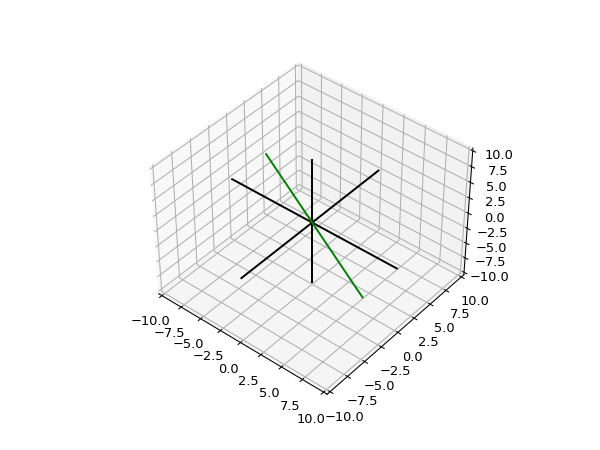

In [114]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])


xx = np.linspace(-10,10,50)
zz = np.linspace(-10,10,50)

# X_axis
ax.plot(np.linspace(-10,10,10), np.zeros(10), np.zeros(10), color="black")
# Y_axis
ax.plot(np.zeros(10), np.linspace(-10,10,10), np.zeros(10), color="black")
# Z_axis 
ax.plot(np.zeros(10), np.zeros(10), np.linspace(-10,10,10), color="black")


# The equation for the plane is -10x + 11y -3z = 0 
# To rewrite it, (-10x + 11y)/3 = z 

y = (-1/2)*xx + 0*zz

ax.plot(xx, y, 0, color="green")

plt.show()

So we got the null space. Now let's plot all the possible values for $X$ that satisfy the equation, $Ax = b$

We are plotting $(X_p + Null(A))$

<IPython.core.display.Javascript object>


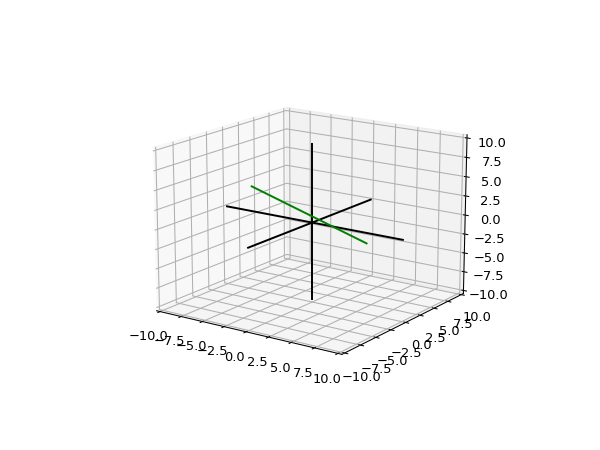

In [115]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])


xx = np.linspace(-10,10,50)
zz = np.linspace(-10,10,50)

# X_axis
ax.plot(np.linspace(-10,10,10), np.zeros(10), np.zeros(10), color="black")
# Y_axis
ax.plot(np.zeros(10), np.linspace(-10,10,10), np.zeros(10), color="black")
# Z_axis 
ax.plot(np.zeros(10), np.zeros(10), np.linspace(-10,10,10), color="black")


# The equation for the plane is -10x + 11y -3z = 0 
# To rewrite it, (-10x + 11y)/3 = z 

y = (-1/2)*xx -1 + 0*zz

ax.plot(xx, y, 3/2, color="green")

plt.show()

<IPython.core.display.Javascript object>


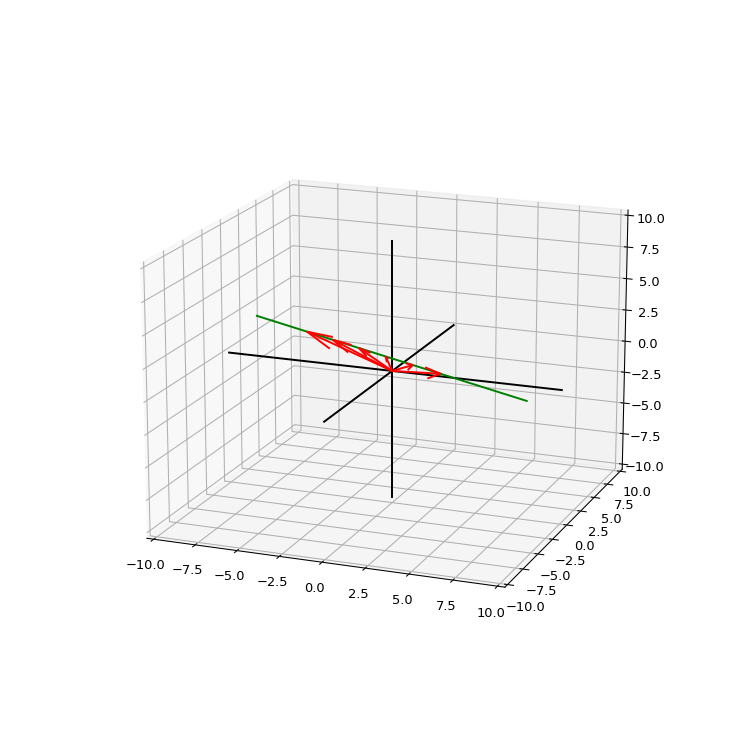

In [154]:
%matplotlib notebook

soa = np.array([[0, 0, 0, pos_vals[0].item(0), pos_vals[0].item(1), pos_vals[0].item(2)], 
                [0, 0, 0, pos_vals[1].item(0), pos_vals[1].item(1), pos_vals[1].item(2)],
                [0, 0, 0, pos_vals[2].item(0), pos_vals[2].item(1), pos_vals[2].item(2)], 
                [0, 0, 0, pos_vals[3].item(0), pos_vals[3].item(1), pos_vals[3].item(2)],
                [0, 0, 0, pos_vals[4].item(0), pos_vals[4].item(1), pos_vals[4].item(2)],
                [0, 0, 0, pos_vals[5].item(0), pos_vals[5].item(1), pos_vals[5].item(2)]])

X, Y, Z, U, V, W = zip(*soa)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(X, Y, Z, U, V, W, color="red")

ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])


xx = np.linspace(-10,10,50)
zz = np.linspace(-10,10,50)

# X_axis
ax.plot(np.linspace(-10,10,10), np.zeros(10), np.zeros(10), color="black")
# Y_axis
ax.plot(np.zeros(10), np.linspace(-10,10,10), np.zeros(10), color="black")
# Z_axis 
ax.plot(np.zeros(10), np.zeros(10), np.linspace(-10,10,10), color="black")


# The equation for the plane is -10x + 11y -3z = 0 
# To rewrite it, (-10x + 11y)/3 = z 

y = (-1/2)*xx -1 + 0*zz

ax.plot(xx, y, 3/2, color="green")

plt.show()

Again, this is not the only solution for $Ax = b$. We have used only one particular $x$ to solve it. And there are many other particular $x$s. 

## Summary for Lecture 8: 

Suppose we have (mxn) matrix A of rank r. 

Condition: $Rank \leq m$ and $Rank \leq n$

This condition is always satisfied. 

**Case 1: Full column rank** 

Condition: $rank = n < m$

> No free columns. Therefore, no free variables. 

> So there are only pivot columns. Therefore, $N(A) = \{zero \ vector\}$

Reduced Row Echelon Form 

> $rref(A) = \begin{bmatrix}I \\ 0\end{bmatrix}$ 

Solution to $Ax=b$
> Since $N(A) = \{zero \ vector\}$, there is only one solution for the equation if it exists.

> The one and only solution will exist if $b$ is in the column space of $A$. 

> **Therefore 0 or 1 solution.** 

> The entire space is $R^m$. However, we have fewer independent column vectors than the dimension of the entire space.

> So if the $b$ is in the column space of A, then there will be one solution for that $b$. There will be only one solution for that $b$ because we have exactly rank number of column vectors in that rank dimensional subspace.

> But if $b$ is not in the column space of A, then it won't have a solution.

**Case 2: Full row rank**

Condition: $rank = m < n$

> $n-r$ free columns and free variables 

> Therefore, $N(A)$ consist of infinitely many number of vectors. 

Reduced Row Echelon Form 

> $rref(A) = \begin{bmatrix} I & F\end{bmatrix}$

Solution to $Ax = b$

> **There are infinitely many number of solutions.** 

> The entire space is $R^m$ and there are $m$ number of independent column vectors. This condition already allows us to get any b in the entire space. 

> And we have $n$ number of column vectors in total. It means we have some extra column vectors. These extra column vectors allow us to have infinitely many ways to a certain $b$. 

> So we can solve for every $b$, and there are infinitely many solutions for each $b$. 

**Case 3: Full rank** 

Condition: $rank = m = n$

> No free columns. Therefore, no free variables. 

> So there are only pivot columns. Therefore, $N(A) = \{zero \ vector\}$

Reduced Row Echelon Form 

> $rref(A) = I$ 

Solution to $Ax = b$

> Unlike a matrix with $rank = n \leq m$, its rank and the dimension of the entire space is the same. 

> Therefore, with the linear combinations of column vectors, I can get any $b$s. 

> However, since there are only entire dimension number of column vectors, **there are only 1 solution for every $b$.** 

**Case 4: Rank less than m and n** 

Condition: $rank < m$ and $rank < n$

> Number of independent columns is less than the dimension of the entire space and less than the number of column vectors.  

> A good way to think about it is to start with a matrix which the condition is $rank < m = n$

> Say, in the three dimensional space, there are three column vectors and only two of them are independent. 

> Therefore, infinite number of linear combinations of the three column vectors can get anywhere within that column space.

> So it has infinite number of solutions, when $b$ is in the column space of A. 

Reduced Row Echelon Form 

> $rref(A) = \begin{bmatrix}I & F \\ 0 & 0\end{bmatrix}$ 

Solution to $Ax = b$

> However, if $b$ is not on the column space of A, then there will be no solution. 

> And it also means that $X_{particular}$ for $b$ doesn't exist. 

> Therefore, **there are infinite number of solutions or zero solution.**

Previously, I said we need to start with $rank < m = n$. Let's think where $rank < m < n$. This means we are adding one more column vector while holding everything constant. Say we have rank of 2, $R^3$ space, and 4 number of column vectors. So all four column vectors stay within that 2-dimensional column space, which is a subspace of $R^3$. So nothing changes. Everything holds true for the condition $rank < m = n$ also holds true for this condition. 

Now, let's think about the condition, $rank < n < m$. For this one, we are adding one more dimension to the entire dimension of a matrix whose condition is $rank < m = n$. So for this, we can probably say we have rank of 2 with 3 column vectors in $R^4$ space. And for this one, nothing changes as well.  

How does null space look like for each condition? 

#### One last takeaway is Nullity

For a (mxn) matrix, $dim \ Null(A) + dim \ Col(A) = n$

- $dim \ Null(A)$ = number of free variables in row reduced form of $A$

- The dimension of the Null Space of a matrix is called the **nullity** of the matrix.


- $dim \ Col(A)$ = number of pivot variables in row reduced form of $A$. 

- The dimension of the Column Space of a mtrix is called the **rank** of the matrix. 


So if I have two free variables, then I will have a two-dimensional Null Space. One free variable, then one-dimensional Null Space. Zero free variable, then zero-dimensional Null Space. Zero-dimension means a point. It doesn't have a direction. 


# Lecture 9: Independence, Basis and Dimension. 

# Lecture 10: The Four Fundamental Subspaces

**4 Subspaces:** 

1. Column Space, $C(A)$ is rank dimensional space in $R^m$
> And its basis are the pivot columns.


2. Null Space, $N(A)$ n-rank dimensional space in $R^n$
> And its basis are the special solutions. 


3. Row Space, $C(A^T)$ is rank dimensional space in $R^n$
> Its basis are the first rank number of rows of $ref(A)$ - (I'll do an example if needed.) 


4. Null Space of $A^T$, $N(A^T)$ is m-rank dimensional space in $R^m$
> For this one, it is not intuitive. So I will explain it below in more detail. 

### Important concepts that I missed to explain previously. 

Say I have a matrix $A$. When we try to find the null space of $A$, we often turn $A$ into $ref(A)$. Because it is easier to compute it. But this doesn't mean that $C(A)$ and $C(ref(A))$ are the same. They actually produce different column spaces. 

But let's just stop here and think for a moment. Interesting thing is that $C(A)$ and $C(ref(A))$ are different. But they have the same null space. In other words, $N(A) = N(ref(A))$. 

And from $ref(A)$, we can figure out pivots and the pivot columns of $ref(A)$. With this information, we can also figure out the pivots of $A$. The columns that corresponds to the pivot columns in $ref(A)$ are the pivot columns of $A$. 

Side Note: 

1. **Row space of $A$ is same thing as $C(A^T)$**

2. **Row space of $A$ is same thing as the row space of $rref(A)$**
> Row elimination doesn't affect the row space. 

#### Here is the explanation for $N(A^T)$

First of all, I would like to find the elimination matrix, $E$ that makes matrix $A$ into a row reduced echelon form $rref(A)$.  

$A \cdot A^{-1} = I$

$E \cdot A \cdot A^{-1} = E$

$rref(A) \cdot A^{-1} = E$

$rref(A) \cdot A^{-1} \cdot A = E \cdot A$

$rref(A) \cdot I = E \cdot A$

$rref(A) = E \cdot A$

Say we don't know what $E$ is. Then we can solve for $E$. 

$A^{T} \cdot E^{T} = rref(A)^{T}$

**But this process works only if $A$ is square and invertible.**

So how else can we find $E$ in our case where we have singular and rectangular matrix, $A$.

We can transform $A$ like the following: $\begin{bmatrix}A & I \end{bmatrix}$

$
A = 
\begin{bmatrix}
1 & 2 & 3 & 1 \\
1 & 1 & 2 & 1 \\
1 & 2 & 3 & 1 \\
\end{bmatrix}
$

$
\begin{bmatrix}A & I \end{bmatrix}
=
\begin{bmatrix}
1 & 2 & 3 & 1 & 1 & 0 & 0 \\
1 & 1 & 2 & 1 & 0 & 1 & 0 \\
1 & 2 & 3 & 1 & 0 & 0 & 1 \\
\end{bmatrix}
$

We don't know the components of $E$. But we know what it does. It is an elimination matrix. So if we do the dot product with $A$, it will get $rref(A)$.

$E \cdot \begin{bmatrix}A & I \end{bmatrix} = \begin{bmatrix}rref(A) & E \end{bmatrix}$

From this process, we can figure out what $E$ is. With this $E$, the following equation holds. 

$E \cdot A = rref(A)$

How do we find E? Well, we do the row elimination to get $rref(A)$ from $A$. And all these elimination process will be stored in the identity matrix. 

Let's check with our example. I have already figured out what $E$ is. I just want to check if $E \cdot \begin{bmatrix}A & I \end{bmatrix} = \begin{bmatrix}rref(A) & E \end{bmatrix}$ works. 

In [255]:
A = np.mat([[1,2,3,1],[1,1,2,1],[1,2,3,1]])
A

matrix([[1, 2, 3, 1],
        [1, 1, 2, 1],
        [1, 2, 3, 1]])

In [245]:
A_I = np.mat([[1,2,3,1,1,0,0],[1,1,2,1,0,1,0],[1,2,3,1,0,0,1]])
A_I

matrix([[1, 2, 3, 1, 1, 0, 0],
        [1, 1, 2, 1, 0, 1, 0],
        [1, 2, 3, 1, 0, 0, 1]])

In [246]:
E

matrix([[ 1,  0,  0],
        [ 1, -1,  0],
        [-1,  0,  1]])

In [251]:
np.dot(E,A_I)

matrix([[ 1,  2,  3,  1,  1,  0,  0],
        [ 0,  1,  1,  0,  1, -1,  0],
        [ 0,  0,  0,  0, -1,  0,  1]])

In [253]:
rref = np.dot(E,A_I)[:,0:4]
rref

matrix([[1, 2, 3, 1],
        [0, 1, 1, 0],
        [0, 0, 0, 0]])

So now what? Up to now, we have figure out this equation with all the components. 

$E \cdot A = rref(A)$

But what we would like to know is the null space of $A^{T}$. 

Let me transpose the equation above. 

$A^{T} \cdot E^{^T} = rref(A)^{T}$

In [257]:
rref.T

matrix([[1, 0, 0],
        [2, 1, 0],
        [3, 1, 0],
        [1, 0, 0]])

In [258]:
# A.T dot E.T

np.dot(A.T,E.T)

matrix([[1, 0, 0],
        [2, 1, 0],
        [3, 1, 0],
        [1, 0, 0]])

We know that the dimension of $rref(A)$ is 3. But its rank is 2. Therefore, the last row of $rref(A)$ is going to be zeros. If we transpose it, then the last column is going to be zeros. 

In [262]:
E.T[:,2]

matrix([[-1],
        [ 0],
        [ 1]])

In [261]:
np.dot(A.T,E.T[:,2])

matrix([[0],
        [0],
        [0],
        [0]])

So the last column of $E^{T}$ is going to correspond to the zeros in the equation. Therefore, the last column of $E^{T}$ is the basis of null space of $A$ transposed, $N(A^{T})$.

# Lecture 11: Matrix Spaces; Rank 1; Small World Graphs

# Review 

Say I have (m x n) matrix A with rank r. 

That means I have a null space, N(A) whose dimension is (n - r). 

I was always confused how to calculate the null space. But Khan academy shows a great way to calculate it. 

I will do a quick example: 

$
A =
\begin{bmatrix}
1 & 1 & 2  \\
2 & 1 & 3  \\
3 & 1 & 4  \\
\end{bmatrix}
\; \; \; 
rref(A) = 
\begin{bmatrix}
1 & 0 & 1  \\
0 & 1 & 1  \\
0 & 0 & 0  \\
\end{bmatrix}
\; \; \; 
rref(A)x = 0 \Longrightarrow
\left[
\begin{array}{ccc|c} 
1 & 0 & 1 & 0 \\ 
0 & 1 & 1 & 0 \\ 
0 & 0 & 0 & 0 \\ 
\end{array}
\right]
$

So the first and the second columns are the pivot columns and the last column is the free column. 

$
\begin{cases}
x_1 + x_3 = 0 \\ 
x_2 + x_3 = 0 \\
\end{cases}
$

$\therefore x_1$ and $x_2$ are the pivot variables. Solve for the pivot variables. 

$
\begin{cases}
x_1 = - x_3 \\ 
x_2 = - x_3 \\
\end{cases}
$

$
\begin{bmatrix}
x_1 \\
x_2 \\ 
x_3 \\ 
\end{bmatrix}
= 
x_3 \cdot 
\begin{bmatrix}
-1 \\ 
-1 \\ 
1
\end{bmatrix} 
$

$\therefore N(A) = C \cdot 
\begin{bmatrix}
-1 \\ 
-1 \\ 
1
\end{bmatrix} $ 

# Lecture 14: Orthogonal Vectors ans Subspaces

Suppose I have a right triangle. 

Then the **Pythagorean Theorem** says that 

$(Opp)^2 + (Adj)^2 = (Hyp)^2$

We can apply the same logic to vectors. But before anything, I would like to define what **norm** is. 

Say, $v_1 = \begin{bmatrix}a_1 \\ a_2 \end{bmatrix} = \begin{bmatrix} 4 \\ 3 \end{bmatrix}$

and $||v_1|| = \sqrt{a_1^2 + a_2^2}$

So, it is essentially the distance of the vector. 

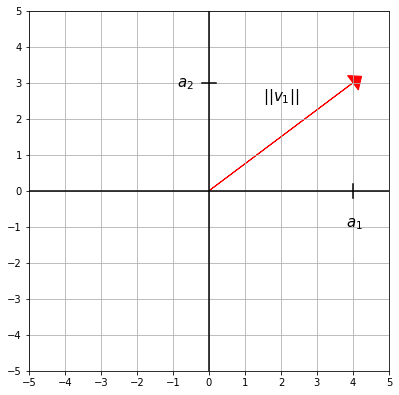

In [39]:
def plot_2d_vector(vector, color):
    return ax.arrow(0,0,vector[0],vector[1], head_width=0.5, head_length=0.3, color=color)

v_1 = np.array([4,3])

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.grid()

ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

ax.xaxis.set_major_locator(MultipleLocator(1.00))
ax.yaxis.set_major_locator(MultipleLocator(1.00))

plot_2d_vector(v_1, "red")

ax.axvline(x=0, color='black')
ax.axhline(y=0, color='black')

ax.axhline(y=3, color='black', xmin=0.48, xmax=0.52)
ax.axvline(x=4, color='black', ymin=0.48, ymax=0.52)

ax.annotate('$||v_1||$', xy=(1.5, 2.5), fontsize=15)
ax.annotate('$a_1$', xy=(3.8, -1), fontsize=15)
ax.annotate('$a_2$', xy=(-0.9, 2.9), fontsize=15)

plt.show()

Say I have another vector, $v_3$, which is a linear combination of vectors, $v_1$ and $v_2$. 

And $v_3 = \begin{bmatrix} a_1 \\ a_2 \end{bmatrix}$

$\therefore \; \; ||v_3|| = \sqrt{a_1^2 + a_2^2}$ &emsp; which is equal to &emsp; $||v_1 + v_2||$

This is the definition of norm when a vector is a combination of two other vectors. 

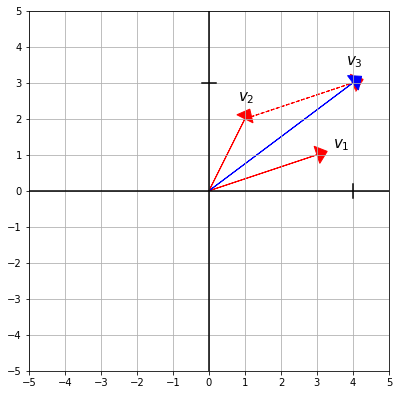

In [55]:
def plot_2d_vector(vector, color):
    return ax.arrow(0,0,vector[0],vector[1], head_width=0.5, head_length=0.3, color=color)

v_1 = np.array([3,1])
v_2 = np.array([1,2])
v_3 = np.array([4,3])

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.grid()

ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

ax.xaxis.set_major_locator(MultipleLocator(1.00))
ax.yaxis.set_major_locator(MultipleLocator(1.00))

plot_2d_vector(v_1, "red")
ax.arrow(1,2,v_1[0],v_1[1], head_width=0.5, head_length=0.3, color="red", linestyle="--")
plot_2d_vector(v_2, "red")
plot_2d_vector(v_3, "blue")

ax.axvline(x=0, color='black')
ax.axhline(y=0, color='black')

ax.axhline(y=3, color='black', xmin=0.48, xmax=0.52)
ax.axvline(x=4, color='black', ymin=0.48, ymax=0.52)

#ax.annotate('$||v_1||$', xy=(1.5, 2.5), fontsize=15)
ax.annotate('$v_1$', xy=(3.45, 1.2), fontsize=15)
ax.annotate('$v_2$', xy=(0.8, 2.5), fontsize=15)
ax.annotate('$v_3$', xy=(3.8, 3.5), fontsize=15)


plt.show()

In pythagorean theorem, right triangle is assumed. It means that the adjacent and the opposite are orthogonal. 

$a_1 \perp a_2$

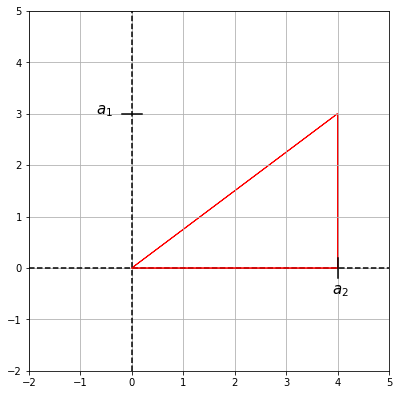

In [92]:
def plot_2d_vector(vector, color):
    return ax.arrow(0,0,vector[0],vector[1], head_width=0, head_length=0, color=color)

v_1 = np.array([4,0])
v_2 = np.array([4,3])

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.grid()

ax.axvline(x=0, color='black', linestyle="--")
ax.axhline(y=0, color='black', linestyle="--")
ax.axhline(y=0, xmin=2/7, xmax=6/7, color='red', linestyle="-")

ax.set_xlim([-2,5])
ax.set_ylim([-2,5])

ax.xaxis.set_major_locator(MultipleLocator(1.00))
ax.yaxis.set_major_locator(MultipleLocator(1.00))

plot_2d_vector(v_1, "red")
plot_2d_vector(v_2, "red")
ax.arrow(4,0,0,3, head_width=0, head_length=0, color='red')


ax.axhline(y=3, color='black', xmin=1.8/7, xmax=2.2/7)
ax.axvline(x=4, color='black', ymin=1.8/7, ymax=2.2/7)

#ax.annotate('$||v_1||$', xy=(1.5, 2.5), fontsize=15)
ax.annotate('$a_1$', xy=(-0.7, 3), fontsize=15)
ax.annotate('$a_2$', xy=(3.9, -0.5), fontsize=15)
#ax.annotate('$v_3$', xy=(3.8, 3.5), fontsize=15)


plt.show()

And the same thing applies to vectors. 

When $v_1 \perp v_2$, the following condition holds true. 

$||v_3||^2 = ||v_1 + v_2||^2 = ||v_1||^2 + ||v_2||^2$

**Let's look at the following example:** 

$v_1 = \begin{bmatrix} 2 \\ -1 \end{bmatrix} \; \; v_2 = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$


$v_1 + v_2 = v_3 = \begin{bmatrix} 3 \\ 1 \end{bmatrix}$


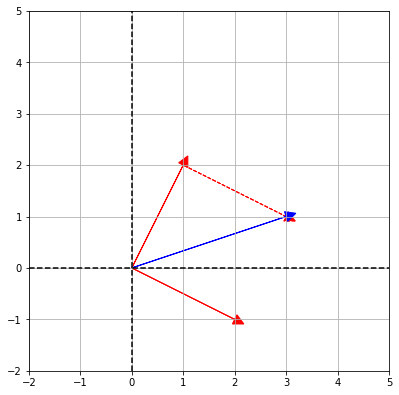

In [101]:
def plot_2d_vector(vector, color):
    return ax.arrow(0,0,vector[0],vector[1], head_width=0.2, head_length=0.2, color=color)

v_1 = np.array([2,-1])
v_2 = np.array([1,2])
v_3 = np.array([3,1])

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.grid()

ax.axvline(x=0, color='black', linestyle="--")
ax.axhline(y=0, color='black', linestyle="--")

ax.set_xlim([-2,5])
ax.set_ylim([-2,5])

ax.xaxis.set_major_locator(MultipleLocator(1.00))
ax.yaxis.set_major_locator(MultipleLocator(1.00))

plot_2d_vector(v_1, "red")
plot_2d_vector(v_2, "red")
ax.arrow(1,2,2,-1, head_width=0.2, head_length=0.2, color="red", linestyle="--")
plot_2d_vector(v_3, "blue")

plt.show()

So, here is the definition. 

When $x \perp y$, &emsp; $||x||^2 + ||y||^2 = ||x+y||^2$

And this is a very important property used to derive another important definition. 

$||x||^2 + ||y||^2 = ||x+y||^2$

$x^Tx + y^Ty = (x+y)^T(x+y)$

**Note:** I can distribute the transpose. 

$(v_1 + v_2)^T = v_1^T + v_2^T$ &ensp; and &ensp; $(AB)^T = A^TB^T$

$x^Tx + y^Ty = (x+y)^T(x+y)$

$x^Tx + y^Ty = (x^T+y^T)(x+y)$

$x^Tx + y^Ty = x^Tx + x^Ty + y^Tx + y^Ty$

$\require{cancel} \cancel{x^Tx} + \cancel{y^Ty} = \cancel{x^Tx} + x^Ty + y^Tx + \cancel{y^Ty}$

$0 = x^Ty + y^Tx$

$x \; \& \; y$ are vectors with same dimension. 

$x^Ty = y^Tx$

$\therefore$ 

$0 = 2x^Ty$

$x^Ty = 0$

**Important:** 
So if &emsp; $v_1^Tv_2 = 0$ &emsp; then &emsp; $v_1^T \perp v_2$

So far, we have learned $Ax = 0$

Say, 
$Ax = 0$ is 

$\left[
\begin{array} \\
row \; vec \; 1 \\ \hline
row \; vec \; 2 \\ \hline
row \; vec \; 3 \\
\end{array}
\right]
\cdot 
\begin{bmatrix}
x_1 \\ x_2 \\ : \\ x_n
\end{bmatrix} 
= 
\begin{bmatrix}
0 \\ 0 \\ 0
\end{bmatrix}
$


This means that every row vector in matrix A is orthogonal (perpendicular) to the null space. If that is so, then the row space of A is also orthogonal to the null space. 

$C(A^T) \perp N(A)$

One interesting thing is that if $C(A^T) \perp N(A)$, then $C(rref(A)^T) \perp N(A)$

The row space of reduced row echelon form of A is also orthogonal to the null space. That is because we only do the row elimination to get $rref(A)$. This is same thing as doing the linear combination for the column vectors, but it is transposed. Therefore, even if we do the row elimination, the row space is not affected.  

**Note:** 
* Say I have a (m x n) matrix A with rank, r. If I am looking at the column space, r dimensional column space is in $R^m$ vector space. 
* Say I have a (m x n) matrix A with rank, r. If I am looking at the row space, r dimensional row space is in $R^n$ vector space. 


**Question:** 

Say I have 2 dimensional null space. Then what is the dimension of matrix A that is orthogonal to the null space? 

Matrix A $\Rightarrow$ (m x n) 

N(A) $\Rightarrow$ 2 dimensional space. 

N(A) = n - r = 2 

possible answer #1: 

(1 x 3) matrix with rank 1 

The row space of A would be one dimensional space (a line space) in $R^3$. 

And then the null space of A would be 2 dimensional space (a plane) in $R^3$. 

$Dim \; R(A) = 1$ and $Dim \; N(A) = 2$ 

$Dim \; R(A) + Dim \; N(A) = R^m$



possible answer #2: 

(2 x 3) matrix with rank 1

The answer is same as above. 

## The rest of the note in my notebook

https://math.stackexchange.com/questions/688339/product-of-inverse-matrices-ab-1